In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [2]:
data=pd.read_csv("datas/Location_of_Disposal_Facilities_and_Sites_Used_for_DSNY-Managed_Waste_20241226.csv")

In [3]:
data

,Name,Unique ID,Type,Street Address,Borough/City,State,Zipcode,Latitude,Longitude,Point
0,91st St Marine Transfer Station (DSNY),181,MTS,1740 York Avenue,Manhattan,NY,10128,40.779299,-73.943137,POINT (-73.9431369838549 40.7792990473106)
1,Bethlehem,294,LF,2335 Applebutter Rd,Bethlehem,PA,18015,40.625325,-75.307146,POINT (-75.3071459639353 40.6253249950004)
2,Keystone,345,LF,249 Dunham Dr,Dunmore,PA,18512,41.422776,-75.605997,POINT (-75.6059970857193 41.4227764252404)
3,Covanta - Hempstead,114,WTE,600 Merchants Concourse,Westbury,NY,11590,40.738175,-73.590597,POINT (-73.5905972370384 40.7381754192889)
4,Seneca Meadows,162,LF,1786 Salcman Rd,Waterloo,NY,13165,42.917090,-76.846185,POINT (-76.8461851760186 42.9170895380449)
5,Waste Management - Varick,103,TS,215 Varick Ave,Brooklyn,NY,11237,40.712744,-73.929520,POINT (-73.9295195760748 40.7127443051081)
6,SouthWest Marine Transfer Station (DSNY),376,MTS,400 Bay 41st St,Brooklyn,NY,11214,40.589554,-73.995791,POINT (-73.995791345263 40.5895543009055)
7,Fairless Hills,100,LF,1400 Bordentown Rd,Morrisville,PA,19067,40.170610,-74.772799,POINT (-74.7727989661533 40.1706100160551)
8,Tunnel Hill Reclamation,449,LF,8822 Tunnel Hill Rd,New Lexington,OH,43764,39.724394,-82.163255,POINT (-82.1632546369199 39.7243943468937)
9,Action Environmental,270,TS,941 Stanley Ave,Brooklyn,NY,11208,40.663483,-73.874627,POINT (-73.8746269112193 40.6634828958449)


In [5]:
latitudes = data["Latitude"]
longitudes = data["Longitude"]

In [ ]:
shapefile_path = 'datas/geo_export_d23170a5-e5a3-40ec-b2bc-491a916d11cd.shp'
nyc = gpd.read_file(shapefile_path)
nyc

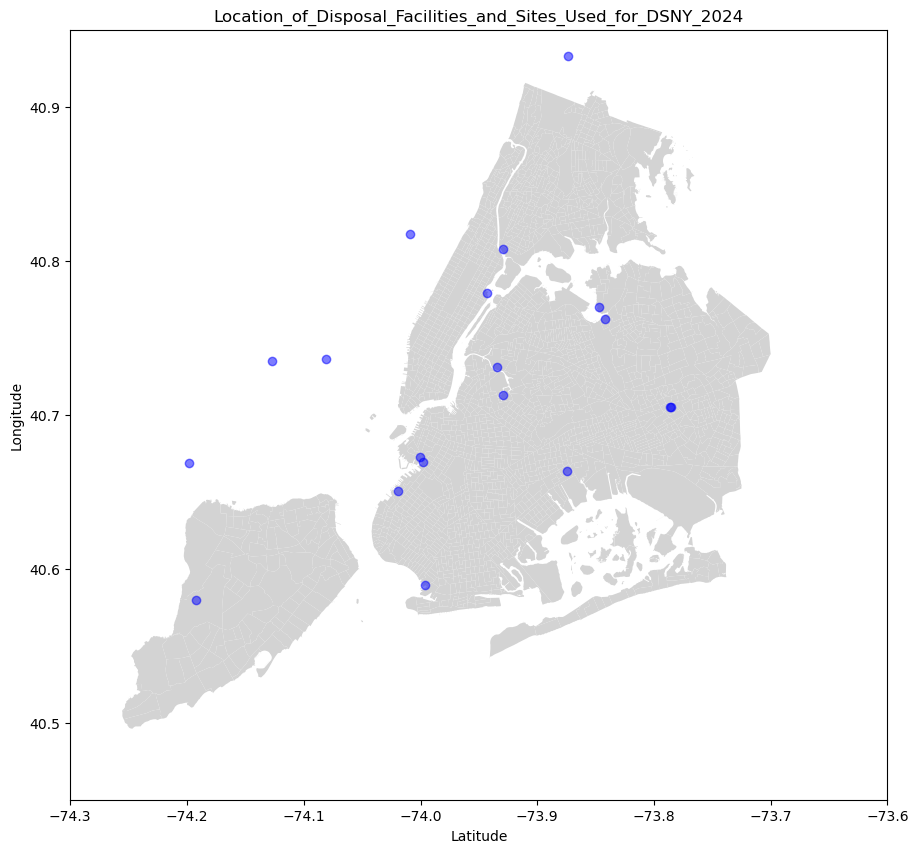

In [186]:
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightgray')
plt.scatter(longitudes,latitudes,marker="o",color="blue",alpha=.51)
plt.xlim([-74.3,-73.6])
plt.ylim([40.45,40.95])
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Location_of_Disposal_Facilities_and_Sites_Used_for_DSNY_2024")
plt.savefig("Location of disposal facilities within NYC", dpi=300, bbox_inches='tight')
plt.show()

In [43]:
data=pd.read_csv("datas/New_York_City_Population_By_Community_Districts.csv")

In [44]:
data


,Borough,CD Number,CD Name,1970 Population,1980 Population,1990 Population,2000 Population,2010 Population
0,Bronx,1,"Melrose, Mott Haven, Port Morris",138557,78441,77214,82159,91497
1,Bronx,2,"Hunts Point, Longwood",99493,34399,39443,46824,52246
2,Bronx,3,"Morrisania, Crotona Park East",150636,53635,57162,68574,79762
3,Bronx,4,"Highbridge, Concourse Village",144207,114312,119962,139563,146441
4,Bronx,5,"University Hts., Fordham, Mt. Hope",121807,107995,118435,128313,128200
5,Bronx,6,"East Tremont, Belmont",114137,65016,68061,75688,83268
6,Bronx,7,"Bedford Park, Norwood, Fordham",113764,116827,128588,141411,139286
7,Bronx,8,"Riverdale, Kingsbridge, Marble Hill",103543,98275,97030,101332,101731
8,Bronx,9,"Soundview, Parkchester",166442,167627,155970,167859,172298
9,Bronx,10,"Throgs Nk., Co-op City, Pelham Bay",84948,106516,108093,115948,120392


In [2]:
data=pd.read_csv("datas/Recycling_Diversion_and_Capture_Rates.csv")

In [7]:
data

#data['Fiscal Year'] = pd.to_datetime(data['MONTH'], format='%Y / %m')

# Filter rows where the year is 2024 or later
df_filtered = data[data['Fiscal Year'] >= 2019]

# Display the filtered DataFrame
df_filtered

df_filtered_BKNO1 = df_filtered[df_filtered['District'] == 'BKNO1']

# Display the filtered DataFrame
df_filtered_BKNO1

,Zone,District,Fiscal Month Number,Fiscal Year,Month Name,Diversion Rate-Total (Total Recycling / Total Waste),Capture Rate-Paper (Total Paper / Max Paper),Capture Rate-MGP (Total MGP / Max MGP),Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100
0,Brooklyn North,BKN01,10,2019,April,14.7,44.9,43.0,44.1
59,Brooklyn North,BKN01,2,2019,August,16.6,51.2,44.8,48.3
118,Brooklyn North,BKN01,6,2019,December,16.5,52.3,46.8,50.0
177,Brooklyn North,BKN01,8,2019,February,15.9,48.3,48.2,48.2
236,Brooklyn North,BKN01,7,2019,January,17.1,49.9,52.0,50.7
295,Brooklyn North,BKN01,1,2019,July,16.8,49.8,47.2,48.6
354,Brooklyn North,BKN01,12,2019,June,16.1,48.5,47.7,48.2
413,Brooklyn North,BKN01,9,2019,March,15.7,48.2,47.2,47.8
472,Brooklyn North,BKN01,11,2019,May,15.7,46.9,47.1,47.0
531,Brooklyn North,BKN01,5,2019,November,15.9,55.4,44.0,50.2


In [37]:
df_filtered_BKNO1 = df_filtered[df_filtered['District'] == 'BKN01']
df_filtered_BKNO2 = df_filtered[df_filtered['District'] == 'BKN02']
df_filtered_BKNO3 = df_filtered[df_filtered['District'] == 'BKN03']
df_filtered_BKNO4 = df_filtered[df_filtered['District'] == 'BKN04']
df_filtered_BKNO5 = df_filtered[df_filtered['District'] == 'BKN05']
df_filtered_BKNO8 = df_filtered[df_filtered['District'] == 'BKN08']
df_filtered_BKNO9 = df_filtered[df_filtered['District'] == 'BKN09']
df_filtered_BKN16 = df_filtered[df_filtered['District'] == 'BKN16']
df_filtered_BKN17 = df_filtered[df_filtered['District'] == 'BKN17']

In [38]:
df_filtered_BKSO6 = df_filtered[df_filtered['District'] == 'BKS06']
df_filtered_BKSO7 = df_filtered[df_filtered['District'] == 'BKS07']
df_filtered_BKS10 = df_filtered[df_filtered['District'] == 'BKS10']
df_filtered_BKS11 = df_filtered[df_filtered['District'] == 'BKS11']
df_filtered_BKS12 = df_filtered[df_filtered['District'] == 'BKS12']
df_filtered_BKS13 = df_filtered[df_filtered['District'] == 'BKS13']
df_filtered_BKS14 = df_filtered[df_filtered['District'] == 'BKS14']
df_filtered_BKS15 = df_filtered[df_filtered['District'] == 'BKS15']
df_filtered_BKS18 = df_filtered[df_filtered['District'] == 'BKS18']

In [39]:
df_filtered_BX01 = df_filtered[df_filtered['District'] == 'BX01']
df_filtered_BX02 = df_filtered[df_filtered['District'] == 'BX02']
df_filtered_BX03 = df_filtered[df_filtered['District'] == 'BX03']
df_filtered_BX04 = df_filtered[df_filtered['District'] == 'BX04']
df_filtered_BX05 = df_filtered[df_filtered['District'] == 'BX05']
df_filtered_BX06 = df_filtered[df_filtered['District'] == 'BX06']
df_filtered_BX07 = df_filtered[df_filtered['District'] == 'BX07']
df_filtered_BX08 = df_filtered[df_filtered['District'] == 'BX08']
df_filtered_BX09 = df_filtered[df_filtered['District'] == 'BX09']
df_filtered_BX10 = df_filtered[df_filtered['District'] == 'BX10']
df_filtered_BX11 = df_filtered[df_filtered['District'] == 'BX11']
df_filtered_BX12 = df_filtered[df_filtered['District'] == 'BX12']


In [72]:
df_filtered_MN01 = df_filtered[df_filtered['District'] == 'MN01']
df_filtered_MN02 = df_filtered[df_filtered['District'] == 'MN02']
df_filtered_MN03 = df_filtered[df_filtered['District'] == 'MN03']
df_filtered_MN04 = df_filtered[df_filtered['District'] == 'MN04']
df_filtered_MN05 = df_filtered[df_filtered['District'] == 'MN05']
df_filtered_MN06 = df_filtered[df_filtered['District'] == 'MN06']
df_filtered_MN07 = df_filtered[df_filtered['District'] == 'MN07']
df_filtered_MN08 = df_filtered[df_filtered['District'] == 'MN08']
df_filtered_MN09 = df_filtered[df_filtered['District'] == 'MN09']
df_filtered_MN10 = df_filtered[df_filtered['District'] == 'MN10']
df_filtered_MN11 = df_filtered[df_filtered['District'] == 'MN11']
df_filtered_MN12 = df_filtered[df_filtered['District'] == 'MN12']

In [40]:
df_filtered_QW01 = df_filtered[df_filtered['District'] == 'QW01']
df_filtered_QW02 = df_filtered[df_filtered['District'] == 'QW02']
df_filtered_QW03 = df_filtered[df_filtered['District'] == 'QW03']
df_filtered_QW04 = df_filtered[df_filtered['District'] == 'QW04']
df_filtered_QW05 = df_filtered[df_filtered['District'] == 'QW05']
df_filtered_QW06 = df_filtered[df_filtered['District'] == 'QW06']
df_filtered_QE07 = df_filtered[df_filtered['District'] == 'QE07']
df_filtered_QW08 = df_filtered[df_filtered['District'] == 'QW08']
df_filtered_QW09 = df_filtered[df_filtered['District'] == 'QW09']
df_filtered_QE10 = df_filtered[df_filtered['District'] == 'QE10']
df_filtered_QE11 = df_filtered[df_filtered['District'] == 'QE11']
df_filtered_QE12 = df_filtered[df_filtered['District'] == 'QE12']
df_filtered_QE13 = df_filtered[df_filtered['District'] == 'QE13']
df_filtered_QE14 = df_filtered[df_filtered['District'] == 'QE14']

In [53]:
df_filtered_SI01 = df_filtered[df_filtered['District'] == 'SI01']
df_filtered_SI02 = df_filtered[df_filtered['District'] == 'SI02']
df_filtered_SI03 = df_filtered[df_filtered['District'] == 'SI03']
df_filtered_SI03

,Zone,District,Fiscal Month Number,Fiscal Year,Month Name,Diversion Rate-Total (Total Recycling / Total Waste),Capture Rate-Paper (Total Paper / Max Paper),Capture Rate-MGP (Total MGP / Max MGP),Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100
58,Staten Island,SI03,10,2019,April,19.5,52.1,90.6,65.8
117,Staten Island,SI03,2,2019,August,19.3,45.4,76.1,56.3
176,Staten Island,SI03,6,2019,December,22.3,48.7,72.8,56.4
235,Staten Island,SI03,8,2019,February,21.6,43.0,81.1,55.2
294,Staten Island,SI03,7,2019,January,23.4,46.4,82.4,57.9
353,Staten Island,SI03,1,2019,July,19.8,45.3,80.1,57.6
412,Staten Island,SI03,12,2019,June,20.5,54.8,95.4,69.2
471,Staten Island,SI03,9,2019,March,20.6,40.5,77.8,52.4
530,Staten Island,SI03,11,2019,May,18.9,50.2,87.4,63.4
589,Staten Island,SI03,5,2019,November,29.5,43.1,75.4,53.3



fig, ax = plt.subplots(figsize=(15, 10))
new_data.plot(ax=ax, color='lightgray')

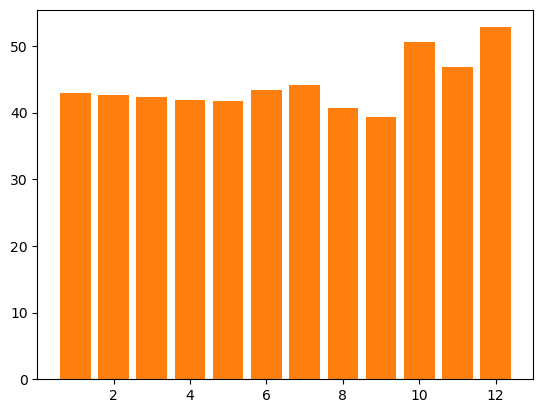

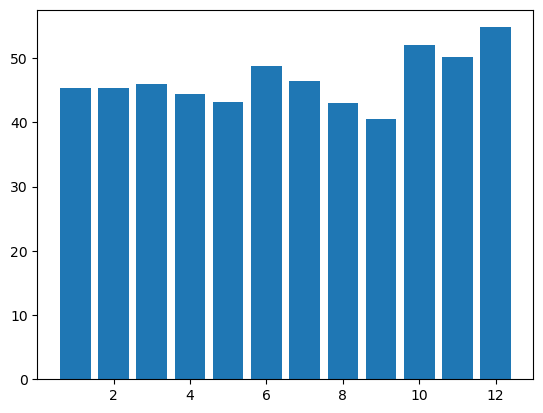

In [52]:
plt.bar(df_filtered_SI01["Fiscal Month Number"],df_filtered_SI01["Capture Rate-Paper (Total Paper / Max Paper)"])
plt.show
plt.bar(df_filtered_SI02["Fiscal Month Number"],df_filtered_SI02["Capture Rate-Paper (Total Paper / Max Paper)"])
plt.show()
plt.bar(df_filtered_SI03["Fiscal Month Number"],df_filtered_SI03["Capture Rate-Paper (Total Paper / Max Paper)"])
plt.show()

In [67]:
Districts=['BX01',
 'BX02',
 'BX03',
 'BX04',
 'BX05',
 'BX06',
 'BX07',
 'BX08',
 'BX09',
 'BX10',
 'BX11',
 'BX12',
 'BK01',
 'BK02',
 'BK03',
 'BK04',
 'BK05',
 'BK06',
 'BK07',
 'BK08',
 'BK09',
 'BK10',
 'BK11',
 'BK12',
 'BK13',
 'BK14',
 'BK15',
 'BK16',
 'BK17',
 'BK18',
 'MN01',
 'MN02',
 'MN03',
 'MN04',
 'MN05',
 'MN06',
 'MN07',
 'MN08',
 'MN09',
 'MN10',
 'MN11',
 'MN12',
 'QN01',
 'QN02',
 'QN03',
 'QN04',
 'QN05',
 'QN06',
 'QN07',
 'QN08',
 'QN09',
 'QN10',
 'QN11',
 'QN12',
 'QN13',
 'QN14',
 'SI01',
 'SI02',
 'SI03']

In [77]:
district_dfs=[df_filtered_BX01,df_filtered_BX02,df_filtered_BX03,df_filtered_BX04,df_filtered_BX05,df_filtered_BX06,df_filtered_BX07,df_filtered_BX08,df_filtered_BX09,
             df_filtered_BX10,df_filtered_BX11,df_filtered_BX12,df_filtered_BKNO1,df_filtered_BKNO2,df_filtered_BKNO3,df_filtered_BKNO4,df_filtered_BKNO5,df_filtered_BKSO6,df_filtered_BKSO7,df_filtered_BKNO8,df_filtered_BKNO9,df_filtered_BKS10,df_filtered_BKS11,df_filtered_BKS12,df_filtered_BKS13,df_filtered_BKS14,df_filtered_BKS15,df_filtered_BKN16,df_filtered_BKN17,df_filtered_BKS18,df_filtered_MN01,
             df_filtered_MN02,df_filtered_MN03,
             df_filtered_MN04,df_filtered_MN05,df_filtered_MN06,df_filtered_MN07,df_filtered_MN08,
        df_filtered_MN09,df_filtered_MN10,df_filtered_MN11,df_filtered_MN12,df_filtered_QW01,df_filtered_QW02,df_filtered_QW03,df_filtered_QW04,df_filtered_QW05,df_filtered_QW06,df_filtered_QE07,df_filtered_QW08,df_filtered_QW09,df_filtered_QE10,df_filtered_QE11,df_filtered_QE12,df_filtered_QE13,df_filtered_QE14,df_filtered_SI01,
             df_filtered_SI02,df_filtered_SI03]
def capture_rates(district_dfs):
    Mean_paper=[]
    Mean_mgp=[]
    Mean_total=[]
    for district_df in district_dfs:

        mean_capture_paper=np.mean(district_df["Capture Rate-Paper (Total Paper / Max Paper)"].tolist())
        mean_capture_mgp=np.mean(district_df["Capture Rate-MGP (Total MGP / Max MGP)"].tolist())
        mean_capture_total=np.mean(district_df["Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100"].tolist())
        Mean_paper.append(mean_capture_paper)
        Mean_mgp.append(mean_capture_mgp)
        Mean_total.append(mean_capture_total)
    return Mean_paper,Mean_mgp,Mean_total
capture_rates(district_dfs)    

([20.166666666666664,
  33.791666666666664,
  25.349999999999994,
  29.89166666666667,
  26.941666666666666,
  36.358333333333334,
  34.61666666666667,
  41.68333333333333,
  23.900000000000002,
  38.358333333333334,
  34.11666666666667,
  33.34166666666666,
  50.73333333333332,
  33.683333333333344,
  36.54166666666667,
  38.28333333333333,
  25.174999999999997,
  45.40833333333333,
  45.56666666666666,
  48.48333333333334,
  32.675000000000004,
  52.43333333333333,
  45.14166666666667,
  49.974999999999994,
  41.7,
  35.05833333333334,
  46.78333333333333,
  22.900000000000002,
  28.15833333333333,
  32.90833333333333,
  45.725,
  40.75833333333334,
  41.958333333333336,
  34.083333333333336,
  33.958333333333336,
  35.25833333333333,
  42.05833333333333,
  42.80833333333333,
  56.24166666666667,
  39.46666666666667,
  40.14166666666666,
  44.5,
  48.775,
  49.20833333333334,
  30.766666666666666,
  33.80833333333333,
  46.0,
  29.683333333333337,
  47.19166666666667,
  nan,
  40.025

In [42]:
data=pd.read_csv("datas/Public_Recycling_Bins_20241227.csv")

In [93]:
data["DSNY Zone"].tolist()

['BKN',
 'BKN',
 'BKN',
 'BKN',
 'BKN',
 'BKN',
 'BKN',
 'BKN',
 'BKN',
 'BKN',
 'BKN',
 'BKN',
 'BKN',
 'BKN',
 'BKN',
 'BKN',
 'BKN',
 'BKN',
 'BKN',
 'BKN',
 'BKN',
 'BKN',
 'BKN',
 'BKN',
 'BKN',
 'BKN',
 'BKN',
 'BKN',
 'BKN',
 'BKN',
 'BKN',
 'BKN',
 'BKN',
 'BKN',
 'BKN',
 'BKN',
 'BKN',
 'BKN',
 'BKN',
 'BKN',
 'BKN',
 'BKN',
 'BKS',
 'BX',
 'BX',
 'BX',
 'BX',
 'BX',
 'BX',
 'BX',
 'BX',
 'BX',
 'BX',
 'BX',
 'BX',
 'BX',
 'BX',
 'BX',
 'BX',
 'MAN',
 'MAN',
 'MAN',
 'MAN',
 'MAN',
 'MAN',
 'MAN',
 'MAN',
 'MAN',
 'MAN',
 'MAN',
 'MAN',
 'MAN',
 'MAN',
 'MAN',
 'MAN',
 'MAN',
 'MAN',
 'MAN',
 'MAN',
 'MAN',
 'MAN',
 'MAN',
 'MAN',
 'QE',
 'QE',
 'QE',
 'QE',
 'QE',
 'QE',
 'QE',
 'QE',
 'QE',
 'QE',
 'QE',
 'QE',
 'QE',
 'QE',
 'QW',
 'QW',
 'QW',
 'QW',
 'QW',
 'QW',
 'QW',
 'QW',
 'SI',
 'SI',
 'SI',
 'SI',
 'SI',
 'SI',
 'SI',
 'SI',
 'SI',
 'SI',
 'SI',
 'SI',
 'SI',
 'SI',
 'SI',
 'SI',
 'SI',
 'SI',
 'SI',
 'SI',
 'SI']

In [159]:
new_data=pd.DataFrame({"Zone":data["DSNY Zone"],"Paper Bins":data["Paper Bins"],"MGP Bins":data["MGP Bins"]})
new_data

,Zone,Paper Bins,MGP Bins
0,BKN,1,1
1,BKN,1,1
2,BKN,1,1
3,BKN,1,1
4,BKN,1,1
...,...,...,...
121,SI,8,8
122,SI,10,10
123,SI,1,1
124,SI,1,1


In [160]:
new_data["Zone_ordinal"]=new_data.Zone.astype("category").cat.codes
new_data

,Zone,Paper Bins,MGP Bins,Zone_ordinal
0,BKN,1,1,0
1,BKN,1,1,0
2,BKN,1,1,0
3,BKN,1,1,0
4,BKN,1,1,0
...,...,...,...,...
121,SI,8,8,6
122,SI,10,10,6
123,SI,1,1,6
124,SI,1,1,6


In [161]:
Zones= new_data["Zone_ordinal"].tolist()
Paper_bins = new_data["Paper Bins"].tolist()
MGP_bins = new_data["MGP Bins"].tolist()

In [84]:
ZPMGP=[[Zones],[Paper_bins]]

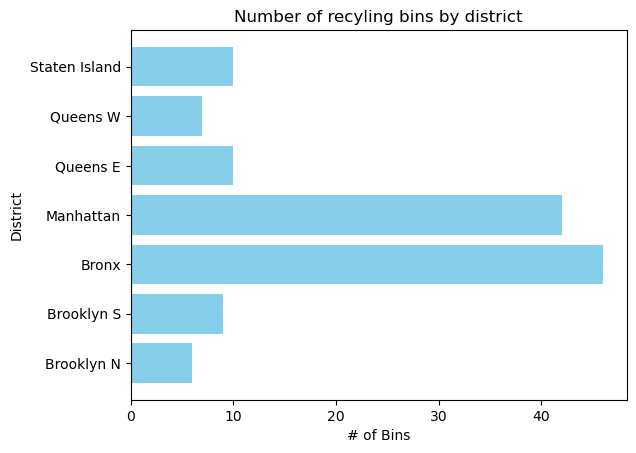

In [162]:
new_labels=["Brooklyn N","Brooklyn S","Bronx","Manhattan","Queens E","Queens W","Staten Island"]
plt.barh(Zones,Paper_bins,color="skyblue")
#plt.barh(Zones,MGP_bins,color="orange")
plt.yticks([0,1,2,3,4,5,6], new_labels) 
plt.xlabel("# of Bins")
plt.ylabel("District")
plt.title("Number of recyling bins by district")
plt.savefig("Number of recyling bins", dpi=300, bbox_inches='tight')

In [2]:
data=pd.read_csv("datas/DSNY_Monthly_Tonnage_Data_20241227.csv")

In [3]:
data['MONTH'] = pd.to_datetime(data['MONTH'], format='%Y / %m')

# Filter rows where the year is 2024 or later
df_filtered = data[data['MONTH'].dt.year >= 2024]

# Display the filtered DataFrame
df_filtered

,MONTH,BOROUGH,COMMUNITYDISTRICT,REFUSETONSCOLLECTED,PAPERTONSCOLLECTED,MGPTONSCOLLECTED,RESORGANICSTONS,SCHOOLORGANICTONS,LEAVESORGANICTONS,XMASTREETONS,BOROUGH_ID
2883,2024-02-01,Bronx,07,3233.3,246.7,387.3,NaN,NaN,NaN,NaN,2.0
2890,2024-06-01,Manhattan,06,2721.9,468.6,341.8,7.3,NaN,NaN,NaN,1.0
2895,2024-08-01,Brooklyn,13,2250.8,168.1,222.9,13.4,NaN,NaN,NaN,3.0
2897,2024-03-01,Queens,05,4387.4,568.4,621.4,58.5,130.0,NaN,NaN,4.0
2899,2024-07-01,Queens,11,3190.8,418.9,441.5,71.2,NaN,NaN,NaN,4.0
...,...,...,...,...,...,...,...,...,...,...,...
24058,2024-07-01,Manhattan,02,1732.3,378.1,245.0,NaN,NaN,NaN,NaN,1.0
24059,2024-07-01,Bronx,08,2384.1,296.9,360.5,38.6,NaN,NaN,NaN,2.0
24060,2024-07-01,Manhattan,09,2180.5,204.2,202.9,NaN,26.9,NaN,NaN,1.0
24061,2024-07-01,Brooklyn,13,2308.5,183.9,219.9,10.1,NaN,NaN,NaN,3.0


In [18]:
new_data=pd.DataFrame({"Zone":df_filtered["BOROUGH"],"Paper":df_filtered["PAPERTONSCOLLECTED"],"MGP":df_filtered["MGPTONSCOLLECTED"],"Refuse":df_filtered["REFUSETONSCOLLECTED"]})
new_data["Zone_ordinal"]=new_data.Zone.astype("category").cat.codes

summary = new_data.groupby('Zone_ordinal')[['Paper', 'MGP','Refuse']].sum().reset_index()
summary

,Zone_ordinal,Paper,MGP,Refuse
0,0,28221.3,39496.8,396768.8
1,1,77404.2,73568.8,779587.4
2,2,58100.3,44806.0,366057.2
3,3,67026.7,83445.4,665661.1
4,4,18183.2,19419.2,166693.9


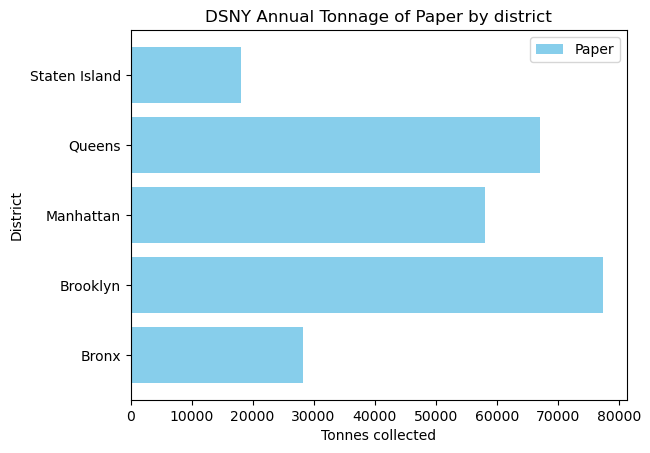

In [15]:
Zones= summary["Zone_ordinal"].tolist()
Paper = summary["Paper"].tolist()
MGP = summary["MGP"].tolist()
new_labels=["Bronx","Brooklyn","Manhattan","Queens","Staten Island"]
plt.barh(Zones,Paper,color="skyblue",label="Paper")
#plt.barh(Zones,Paper,alpha=0.4,color="#a2c2e1",label="Paper")
plt.yticks([0,1,2,3,4], new_labels) 
plt.xlabel("Tonnes collected")
plt.ylabel("District")
plt.title("DSNY Annual Tonnage of Paper by district")
plt.legend()
plt.savefig("stacked_bar_chart_paper_tonnes_nyc.png", dpi=300, bbox_inches='tight') 

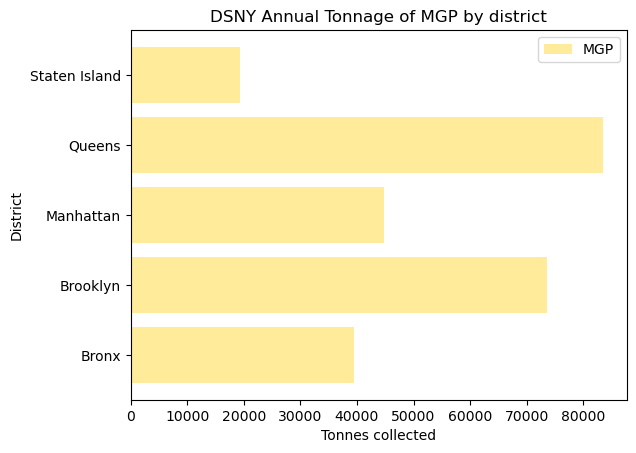

In [17]:
Zones= summary["Zone_ordinal"].tolist()
Paper = summary["Paper"].tolist()
MGP = summary["MGP"].tolist()
new_labels=["Bronx","Brooklyn","Manhattan","Queens","Staten Island"]
plt.barh(Zones,MGP,color="#ffeb99",label="MGP")
#plt.barh(Zones,Paper,alpha=0.4,color="#a2c2e1",label="Paper")
plt.yticks([0,1,2,3,4], new_labels) 
plt.xlabel("Tonnes collected")
plt.ylabel("District")
plt.title("DSNY Annual Tonnage of MGP by district")
plt.legend()
plt.savefig("stacked_bar_chart_mgp_tonnes_nyc.png", dpi=300, bbox_inches='tight')

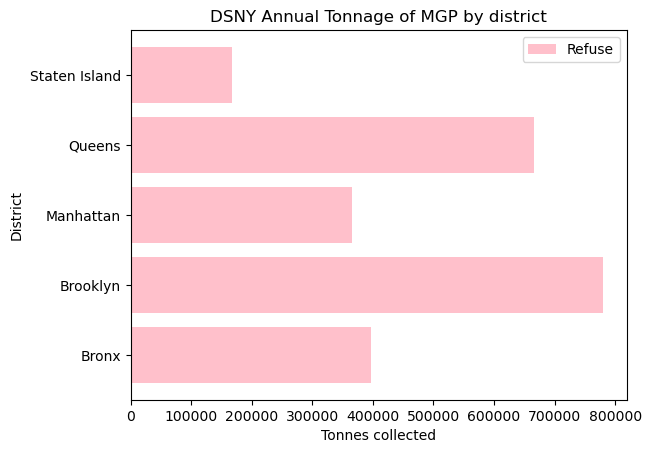

In [19]:
Zones= summary["Zone_ordinal"].tolist()
Refuse = summary["Refuse"].tolist()
new_labels=["Bronx","Brooklyn","Manhattan","Queens","Staten Island"]
plt.barh(Zones,Refuse,color="pink",label="Refuse")
#plt.barh(Zones,Paper,alpha=0.4,color="#a2c2e1",label="Paper")
plt.yticks([0,1,2,3,4], new_labels) 
plt.xlabel("Tonnes collected")
plt.ylabel("District")
plt.title("DSNY Annual Tonnage of MGP by district")
plt.legend()
plt.savefig("stacked_bar_chart_mgp_tonnes_nyc.png", dpi=300, bbox_inches='tight')

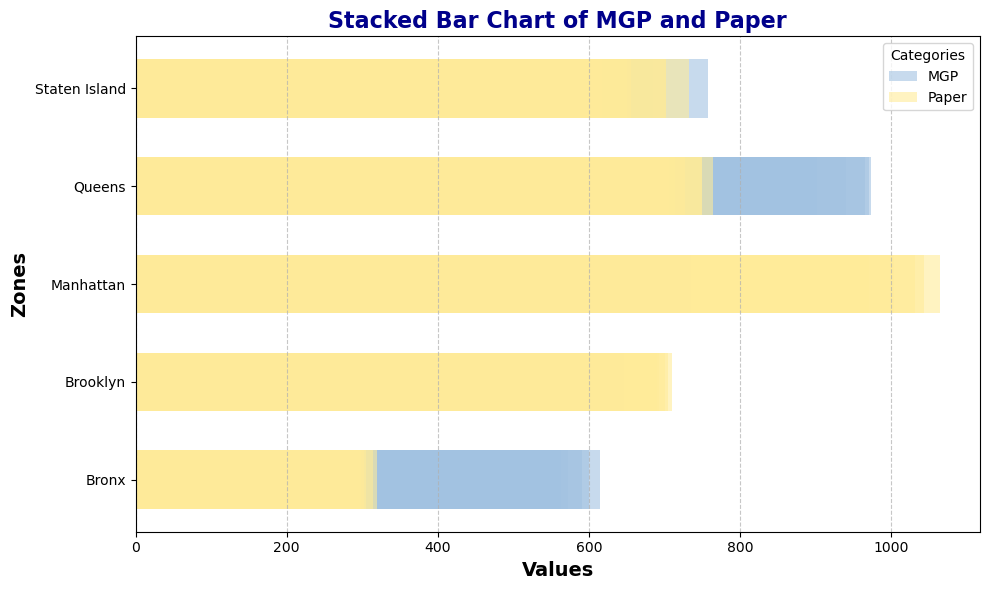

In [173]:
fig, ax = plt.subplots(figsize=(10, 6))  # Set figure size

# Create the bars with pastel colors and apply transparency (alpha)
ax.barh(Zones, MGP, color="#a2c2e1", alpha=0.6, label="MGP", height=0.6)  # Pastel blue with transparency
ax.barh(Zones, Paper, color="#ffeb99", alpha=0.6, label="Paper", height=0.6) 
ax.set_yticks(range(len(new_labels)))  # Position the labels correctly
ax.set_yticklabels(new_labels)

# Set the title and axis labels with larger, more readable fonts
ax.set_title('Stacked Bar Chart of MGP and Paper', fontsize=16, fontweight='bold', color='darkblue')
ax.set_xlabel('Values', fontsize=14, fontweight='bold', color='black')
ax.set_ylabel('Zones', fontsize=14, fontweight='bold', color='black')

# Optional: Add gridlines to the x-axis for better readability
ax.grid(True, axis='x', linestyle='--', alpha=0.7)

# Display the legend to explain the colors
ax.legend(title='Categories')

# Adjust layout to prevent clipping of labels
plt.tight_layout()

In [193]:
from shapely.geometry import MultiPolygon, Polygon
data=pd.read_csv("datas/DSNY_Frequencies.csv")

In [194]:
gdf = gpd.GeoDataFrame(data["multipolygon"], geometry='geometry')

# Plot the MultiPolygon geometries
gdf.plot()

# Optional: Add labels and title
plt.title('MULTIPOLYGON Example')

# Show the plot
plt.show()

ValueError: Unknown column geometry

In [196]:
data=pd.read_csv("datas/Public_Recycling_Bins.csv")

In [197]:
data

,DSNY Zone,DSNY District,Site type,Site Location,Partner,Paper Bins,MGP Bins
0,BKN,BKN02,CITY AGENCY,120 SCHERMERHORN ST - INSIDE BUILDING,DCAS,1,1
1,BKN,BKN02,CITY AGENCY,141 LIVINGSTON ST - INSIDE BUILDING,DCAS,1,1
2,BKN,BKN02,CITY AGENCY,345 ADAMS ST - INSIDE BUILDING,DCAS,1,1
3,BKN,BKN02,CITY AGENCY,360 ADAMS ST - INSIDE BUILDING,DCAS,1,1
4,BKN,BKN02,SPORTS ARENA,6TH AVE & ATLANTIC AVE,BARCLAY CENTER,1,1
...,...,...,...,...,...,...,...
121,SI,SI02,PARK,FRANKLIN D. ROOSEVELT BOARDWALK,NYC PARKS - FRANKLIN D. ROOSEVELT BOARDWALK,8,8
122,SI,SI02,SCHOOL,2800 VICTORY BLVD - COLLEGE OF STATEN ISLAND,CUNY - COLLEGE OF STATEN ISLAND,10,10
123,SI,SI03,PARK,222 POLLION AVE - BLUE HERON NATURE CENTER,NYC PARKS - BLUE HERON NATURE CENTER,1,1
124,SI,SI03,PARK,FRESH KILLS PARK VISITOR CENTER,NYC PARKS - FRESH KILLS PARK,1,1


In [198]:
pip install tabula-py

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 9.3 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [20]:
pdf_file="datas/AllBorough_PSRRMay2016.pdf"

In [21]:
pip install camelot-py


Note: you may need to restart the kernel to use updated packages.


In [22]:
import camelot

In [23]:
tables = camelot.read_pdf(pdf_file, pages='all', flavor='stream')
df = tables[1].df

In [318]:
tables[17].df

,0,1,2,3,4,5,6,7,8
0,,,,,,STATEN ISLAND DSNY PUBLIC SPACE RECYCLING SITES,,,
1,,,,,SET,,,,
2,,,,,,,,# OF,# OF
3,ZONE,DISTRICT,TYPE,STYLE,PLACED,SITE NAME/ BASKET LOCATION,PARTNER (IF ANY),,
4,,,,,,,,PAPER,MGP


In [24]:
df = tables[17].df
df_SI= df.reset_index(drop=True)
df_SI = df_SI.drop([0,1, 2,3,5,89,90,91,92,93,94,95,96,97,98,99,100,101,102])
# Reset index (optional)
df_SI = df_SI.reset_index(drop=True)
df_SI

,0,1,2,3,4,5,6,7,8
0,,,,,,,,PAPER,MGP
1,SI,SI01,CITY AGENCY,OLD,2011,S/W/C CENTRAL AVE & HYATT ST ‐ COURT HOUSE,DCAS ‐ CRIMINAL COURT,1,1
2,SI,SI01,CITY AGENCY,OLD,2011,S/E/C RICHMOND TERR & WALL ST,DCAS ‐ CRIMINAL COURT,1,1
3,SI,SI01,PARK,OLD,2011,2137 RICHMOMND TERRACE ‐ FABER POOL,NYC PARKS ‐ FABER POOL,1,1
4,SI,SI01,PARK,OLD,2011,899 HENDERSON AVE ‐ WEST BRIGHTON POOL,NYC PARKS ‐ WEST BRIGHTON POOL,1,1
...,...,...,...,...,...,...,...,...,...
79,SI,SI03,PARK,NEW,2015,GREAT KILLS PARK,NPS ‐ GREAT KILLS PARK,8,8
80,SI,SI03,DISTRICT,NEW,2015,CLEVELAND PL AND DURANT AVE ‐ IS 24,N/A,1,1
81,SI,SI03,DISTRICT,NEW,2015,IFO 455 HUGUENOT AVE ‐ IS 75,N/A,1,1
82,SI,SI03,DISTRICT,NEW,2015,IFO 100 LUTEN AVE ‐ TOTTENVILLE HS,N/A,1,1


In [25]:
df=pd.concat([tables[2].df,tables[3].df,tables[4].df,tables[5].df,tables[6].df],axis=0, ignore_index=True)
df.reset_index(drop=True)
df_MAN=df.drop([0,1,2,3])
df_MAN = df_MAN.reset_index(drop=True)
df_MAN
#df_MAN

,0,1,2,3,4,5,6,7,8
0,ZONE,DISTRICT,TYPE,STYLE,PLACED,SITE NAME/ BASKET LOCATION,PARTNER (IF ANY),,
1,,,,,,,,PAPER,MGP
2,,,,,OUT,,,,
3,MAN,M01,PARK,OLD,2008,N/E/C CHAMBERS ST & CHURCH ST,N/A,1,1
4,MAN,M01,PARK,OLD,2008,N/W/C CHAMBERS ST & GREENWICH ST,N/A,1,1
...,...,...,...,...,...,...,...,...,...
590,MAN,M12,DISTRICT,NEW,2015,N/W/C 181ST ST AND ST NICHOLAS AVE,N/A,1,1
591,MAN,M12,DISTRICT,NEW,2015,N/W/C 181ST ST AND ST NICHOLAS AVE,N/A,1,1
592,MAN,M12,DISTRICT,NEW,2015,S/W/C 168TH ST AND BROADWAY,N/A,1,1
593,MAN,M12,DISTRICT,NEW,2015,S/W/C 165TH ST AND BROADWAY,N/A,1,1


In [26]:
#df=pd.concat([tables[2].df,tables[3].df,tables[4].df,tables[5].df,tables[6].df],axis=0, ignore_index=True)
df=tables[7].df
df
df_BX=df.drop([0,1,2,3])
df_BX = df_BX.reset_index(drop=True)
df_BX

,0,1,2,3,4,5,6,7,8
0,,,,,,,,PAPER,MGP
1,,,,,OUT,,,,
2,BX,BX01,BID,OLD,2008,3RD AVENUE AND 149TH ST,BID ‐ HUB 3RD AVE,1,1
3,BX,BX01,DISTRICT,OLD,2012,ALEXANDER AVE AND BRUCKNER BLVD,N/A,1,1
4,BX,BX01,PARK,OLD,2013,450 ST. ANNS AVE ‐ ST MARYS RECREATION CENTER,NYC PARKS‐ ST. MARYS RECREATION CENTER,1,1
...,...,...,...,...,...,...,...,...,...
108,BX,BX11,DISTRICT,NEW,2015,N/E WHITEPLAINS RD AND LYDIG AVE.,N/A,1,1
109,BX,BX11,DISTRICT,NEW,2015,S/W WILLIAMSBRIDGE RD AND LYDIG AVE.,N/A,1,1
110,BX,BX12,DISTRICT,OLD,2012,E GUN HILL RD AND BRONXWOOD AVE,N/A,1,1
111,BX,BX12,SCHOOL,OLD,2012,1400 NEEDHAM AVE,P.S. 78,2,2


In [27]:
df=tables[10].df
df.reset_index(drop=True)
df_BKN=df.drop([0,1,2,3])
df_BKN = df_BKN.reset_index(drop=True)
df_BKN


,0,1,2,3,4,5,6
0,BKN,BK01,PARK,OLD,2008,MC CARREN PARK,NYC PARKS
1,BKN,BK01,PARK,OLD,2013,MCCARREN PLAY CENTER,NYC PARKS
2,BKN,BK01,DISTRICT,NEW,2014,S/W BEDFORD AVE AND METROPOLITAN AVE,N/A
3,BKN,BK01,DISTRICT,NEW,2014,N/E BEDFORD AND METROPOLITAN AVE,N/A
4,BKN,BK01,DISTRICT,NEW,2014,S/W BEDFORD AVE AND NORTH 3RD ST,N/A
...,...,...,...,...,...,...,...
90,BKN,BK17,DISTRICT,NEW,2015,S/W NOSTRAND AVE AND CHURCH AVE,N/A
91,BKN,BK17,DISTRICT,NEW,2015,N/W NOSTRAND AVE AND CHURCH AVE,N/A
92,BKN,BK17,DISTRICT,NEW,2015,N/W UTICA AVE AND CHURCH AVE,N/A
93,BKN,BK17,DISTRICT,NEW,2015,S/E UTICA AVE AND CHURCH AVE,N/A


In [28]:
df=pd.concat([tables[11].df,tables[12].df],axis=0,ignore_index=True)
df.reset_index(drop=True)
df_BKS=df.drop([0,1,2,3])
df_BKS = df_BKS.reset_index(drop=True)
df_BKS

,0,1,2,3,4,5,6,7,8
0,,,,,,,,PAPER,MGP
1,,,,,OUT,,,,
2,BKS,BK06,PARK,OLD,2008,9TH ST AND PPW,NYC PARKS ‐ PROSPECT PARK,1,1
3,BKS,BK06,BID,OLD,2008,7TH AVE AND 6TH ST,BID ‐ PARK SLOPE,1,1
4,BKS,BK06,PARK,OLD,2010,PPSW AND 15TH ST,NYC PARKS ‐ PROSPECT PARK,1,1
...,...,...,...,...,...,...,...,...,...
175,BKS,BK18,DISTRICT,NEW,2015,SE AVE N & E. 52ND ST,N/A,1,1
176,BKS,BK18,DISTRICT,NEW,2015,NW AVE N & E. 52ND ST,N/A,1,1
177,BKS,BK18,DISTRICT,NEW,2015,SE AVE N & E. 51ND ST,N/A,1,1
178,BKS,BK18,DISTRICT,NEW,2015,NW AVE N & E. 51ND ST,N/A,1,1


In [29]:
df=tables[13].df
df_QW=df.drop([0,1,2,3])
df_QW = df_QW.reset_index(drop=True)
df_QW

,0,1,2,3,4,5,6,7,8
0,,,,,,,,PAPER,MGP
1,,,,,OUT,,,,
2,QW,QW01,BID,OLD,2009,STEINWAY ST BETWEEN 34TH & BROADWAY,BID ‐ STIENWAY STREET BID,1,1
3,QW,QW01,PARK,OLD,2011,ASTORIA BLVD SOUTH AND 31ST ST,NYC PARKS ‐ COLUMBUS TRIANGLE (ASTORIA TRIANGLE),1,1
4,QW,QW01,DISTRICT,NEW,2015,N/W 41 ST. AND BROADWAY,N/A,1,1
...,...,...,...,...,...,...,...,...,...
105,QW,QW09,DISTRICT,NEW,2015,N/W 101 AVE AND 94 ST,N/A,1,1
106,QW,QW09,DISTRICT,NEW,2015,N/E 101 AVENUE AND 111 ST.,N/A,1,1
107,QW,QW09,DISTRICT,NEW,2015,N/E JAMAICA AND METROPOLITAN AVENUE,N/A,1,1
108,QW,QW09,DISTRICT,NEW,2015,S/W JAMAICA AND LEFFERTS BLVD.,N/A,1,1


In [30]:
df=pd.concat([tables[14].df,tables[15].df],axis=0,ignore_index=True)
df.reset_index(drop=True)
df_QE=df.drop([0,1,2,3])
df_QE = df_QE.reset_index(drop=True)
df_QE

,0,1,2,3,4,5,6,7,8
0,,,,,,,,PAPER,MGP
1,,,,,OUT,,,,
2,QE,QE07,DISTRICT,OLD,2009,150TH ST AND 14TH AVE,N/A,1,1
3,QE,QE07,NON‐PROFIT,OLD,2012,43‐50 MAIN ST ‐ QUEENS BOTANICAL GARDEN,QUEENS BOTANICAL GARDEN,10,10
4,QE,QE07,PARK,OLD,2013,DUANE ROAD & TOTTEN AVE ‐ FORT TOTTEN PARK,NYC PARKS ‐ FORT TOTTEN PARK,3,3
...,...,...,...,...,...,...,...,...,...
163,QE,QE14,DISTRICT,NEW,2015,N/W BEACH CHANNEL DRIVE & BEACH 62ND STREET,N/A,1,1
164,QE,QE14,DISTRICT,NEW,2015,N/W MOTT AVE & CORNEGA ST,N/A,1,1
165,QE,QE14,DISTRICT,NEW,2015,N/E BEACH CHANNEL DRIVE & BEACH 51ST STEET,N/A,1,1
166,QE,QE14,DISTRICT,NEW,2015,S/E ROCKAWAY BEACH BLVD & BEACH 110 ST,N/A,1,1


In [32]:
df_BX.coluQWs = ["Borough","District","Type","Estb","Year","Loc","Run by","Paper bins","MGP bins"]
#df_BX[["District","Paper bins","MGP bins"]].groupby("District").sum()
df=df_BX[["District","Paper bins","MGP bins"]]
df_cleaned = df[df['District'] != '']

# Convert 'Paper bins' and 'MGP bins' columns to numeric, coercing errors (e.g., for 'MGP' and empty strings)
df_cleaned.loc[:,'Paper bins'] = pd.to_numeric(df_cleaned['Paper bins'], errors='coerce')
df_cleaned.loc[:,'MGP bins'] = pd.to_numeric(df_cleaned['MGP bins'], errors='coerce')
grouped_df = df_cleaned.groupby('District')[['Paper bins', 'MGP bins']].sum()

grouped_df

,Paper bins,MGP bins
District,,
BX01,10,10
BX02,9,9
BX03,6,6
BX04,18,18
BX05,16,16
BX06,18,18
BX07,10,10
BX08,43,43
BX09,6,6


In [33]:
df_BKS.columns = ["Borough","District","Type","Estb","Year","Loc","Run by","Paper bins","MGP bins"]
#df_BX[["District","Paper bins","MGP bins"]].groupby("District").sum()
df=df_BKS[["District","Paper bins","MGP bins"]]
df_cleaned = df[df['District'] != '']

# Convert 'Paper bins' and 'MGP bins' columns to numeric, coercing errors (e.g., for 'MGP' and empty strings)
df_cleaned.loc[:,'Paper bins'] = pd.to_numeric(df_cleaned['Paper bins'], errors='coerce')
df_cleaned.loc[:,'MGP bins'] = pd.to_numeric(df_cleaned['MGP bins'], errors='coerce')
grouped_df = df_cleaned.groupby('District')[['Paper bins', 'MGP bins']].sum()

grouped_df

,Paper bins,MGP bins
District,,
BK06,75,75
BK07,18,18
BK10,11,12
BK11,12,12
BK12,12,12
BK13,40,40
BK14,13,13
BK15,13,13
BK18,14,14


In [34]:
df_MAN.columns = ["Borough","District","Type","Estb","Year","Loc","Run by","Paper bins","MGP bins"]
#df_BX[["District","Paper bins","MGP bins"]].groupby("District").sum()
df=df_MAN[["District","Paper bins","MGP bins"]]
df_cleaned = df[df['District'] != '']

# Convert 'Paper bins' and 'MGP bins' columns to numeric, coercing errors (e.g., for 'MGP' and empty strings)
df_cleaned.loc[:,'Paper bins'] = pd.to_numeric(df_cleaned['Paper bins'], errors='coerce')
df_cleaned.loc[:,'MGP bins'] = pd.to_numeric(df_cleaned['MGP bins'], errors='coerce')
grouped_df = df_cleaned.groupby('District')[['Paper bins', 'MGP bins']].sum()

grouped_df

,Paper bins,MGP bins
District,,
DISTRICT,0,0
M01,85.0,84.0
M02,56.0,56.0
M03,47.0,47.0
M04,39.0,39.0
M05,61.0,60.0
M06,12.0,12.0
M07,144.0,144.0
M08,65.0,66.0


In [136]:
data=pd.read_csv("datas/DemographicsTable.csv")
data

,District,Organic Tons,MGP tons,Paper Tons,Refuse Tons,Diversion rate (%),Total Population,Median Age,Population/acre,Hispanic,...,Asian non-hispanic,Others non-hispanic,Non-hispanic of 2 or more races,Family household(%),Non-family household (%),Housing units,Median household income (dollars),Mean household income (dollars),Paper bins,MGP bins
0,BX01,0.0,5.3,5.5,148.1,6.8,100369,32.9,75.1,66.7,...,0.9,0.9,1.5,66.4,33.6,36640,29005,47018,10,10
1,BX02,2.8,5.4,4.5,68.9,15.5,55420,33.4,39.7,71.3,...,0.7,0.9,1.3,65.9,34.1,18800,38580,55892,9,9
2,BX03,3.0,6.1,5.9,119.7,11.1,92352,32.9,86.9,56.3,...,0.5,1.0,1.7,66.2,33.8,33823,33542,49457,6,6
3,BX04,2.5,12.1,10.0,162.8,13.2,151523,34.6,114.6,64.8,...,1.7,1.0,1.4,65.5,34.5,54431,40485,58692,18,18
4,BX05,2.2,12.2,8.5,149.0,13.3,135880,33.5,149.5,68.1,...,1.4,1.2,1.4,67.7,32.3,46946,37820,51419,16,16
5,BX06,1.6,8.5,9.5,113.9,14.7,88122,31.6,87.5,63.4,...,1.3,1.0,1.7,62.3,37.7,32444,31173,51642,18,18
6,BX07,0.1,16.7,11.3,155.7,15.3,145525,34.9,115.6,68.0,...,6.9,1.3,1.5,65.1,34.9,52826,43984,60455,10,10
7,BX08,3.1,13.5,12.9,110.1,21.1,106511,40.8,53.0,48.9,...,5.0,1.2,2.5,60.0,40.0,44945,73352,106419,43,43
8,BX09,1.8,14.0,9.9,195.7,11.6,186667,35.8,73.1,55.1,...,11.1,2.1,2.2,68.0,32.0,68000,50000,67995,6,6
9,BX10,0.1,14.1,12.0,131.3,16.6,132323,42.2,34.0,41.2,...,7.3,1.3,2.1,61.6,38.1,55315,67384,89074,12,12


In [44]:
data=data[["Mean household income (dollars)","Paper Tons"]]

cov_matrix = np.cov(data["Mean household income (dollars)"], data["Paper Tons"])
covariance = cov_matrix[0, 1]
print(f"Covariance: {covariance}")

# Correlation
correlation = np.corrcoef(data["Mean household income (dollars)"], data["Paper Tons"])[0, 1]
print(f"Correlation: {correlation}")

# Linear regression to find R²
X = data["Mean household income (dollars)"].values.reshape(-1, 1)  # Reshape for sklearn
y = data["Paper Tons"].values
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
print(f"R²: {r2}")

Covariance: 184236.79918176495
Correlation: 0.4125365428474781
R²: 0.17018639918454948


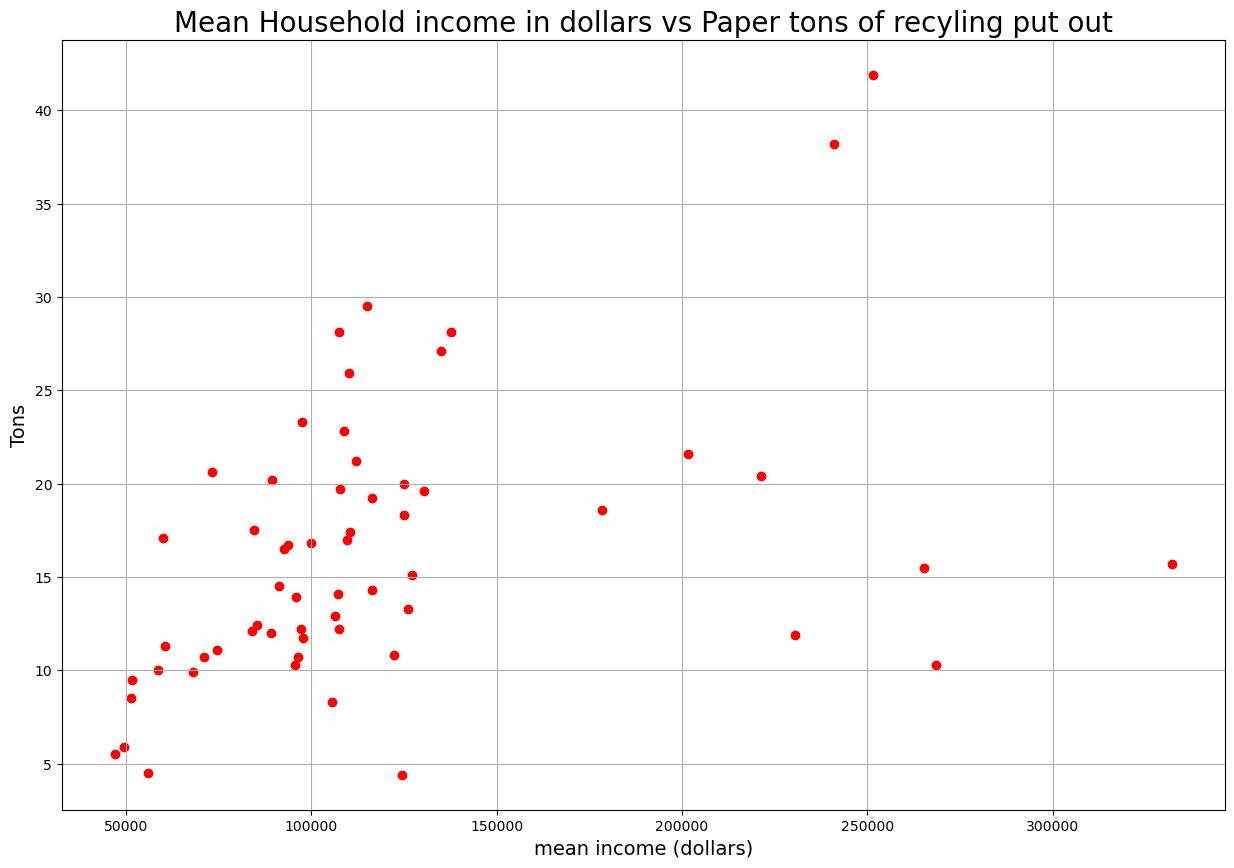

In [36]:
plt.figure(figsize=(15,10))
plt.scatter(data["Mean household income (dollars)"],data["Paper Tons"],color="red",marker="o")
plt.xlabel("mean income (dollars)",fontsize=14)
plt.ylabel("Tons",fontsize=14)
plt.title("Mean Household income in dollars vs Paper tons of recyling put out",fontsize=20)
plt.grid(True)
plt.savefig('income_vs_tons')
plt.show()

In [49]:
data=data[["Mean household income (dollars)","MGP tons"]]

cov_matrix = np.cov(data["Mean household income (dollars)"], data["MGP tons"])
covariance = cov_matrix[0, 1]
print(f"Covariance: {covariance}")

# Correlation
correlation = np.corrcoef(data["Mean household income (dollars)"], data["MGP tons"])[0, 1]
print(f"Correlation: {correlation}")

# Linear regression to find R²
X = data["Mean household income (dollars)"].values.reshape(-1, 1)  # Reshape for sklearn
y = data["MGP tons"].values
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
print(f"R²: {r2}")

Covariance: 16683.27063120979
Correlation: 0.042020870319467676
R²: 0.0017657535424056015


In [54]:
data=data[["Population/acre","MGP tons"]]

cov_matrix = np.cov(data["Population/acre"], data["MGP tons"])
covariance = cov_matrix[0, 1]
print(f"Covariance: {covariance}")

# Correlation
correlation = np.corrcoef(data["Population/acre"], data["MGP tons"])[0, 1]
print(f"Correlation: {correlation}")

# Linear regression to find R²
X = data["Population/acre"].values.reshape(-1, 1)  # Reshape for sklearn
y = data["MGP tons"].values
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
print(f"R²: {r2}")

Covariance: -47.59635008766803
Correlation: -0.1769488387315825
R²: 0.03131089152845534


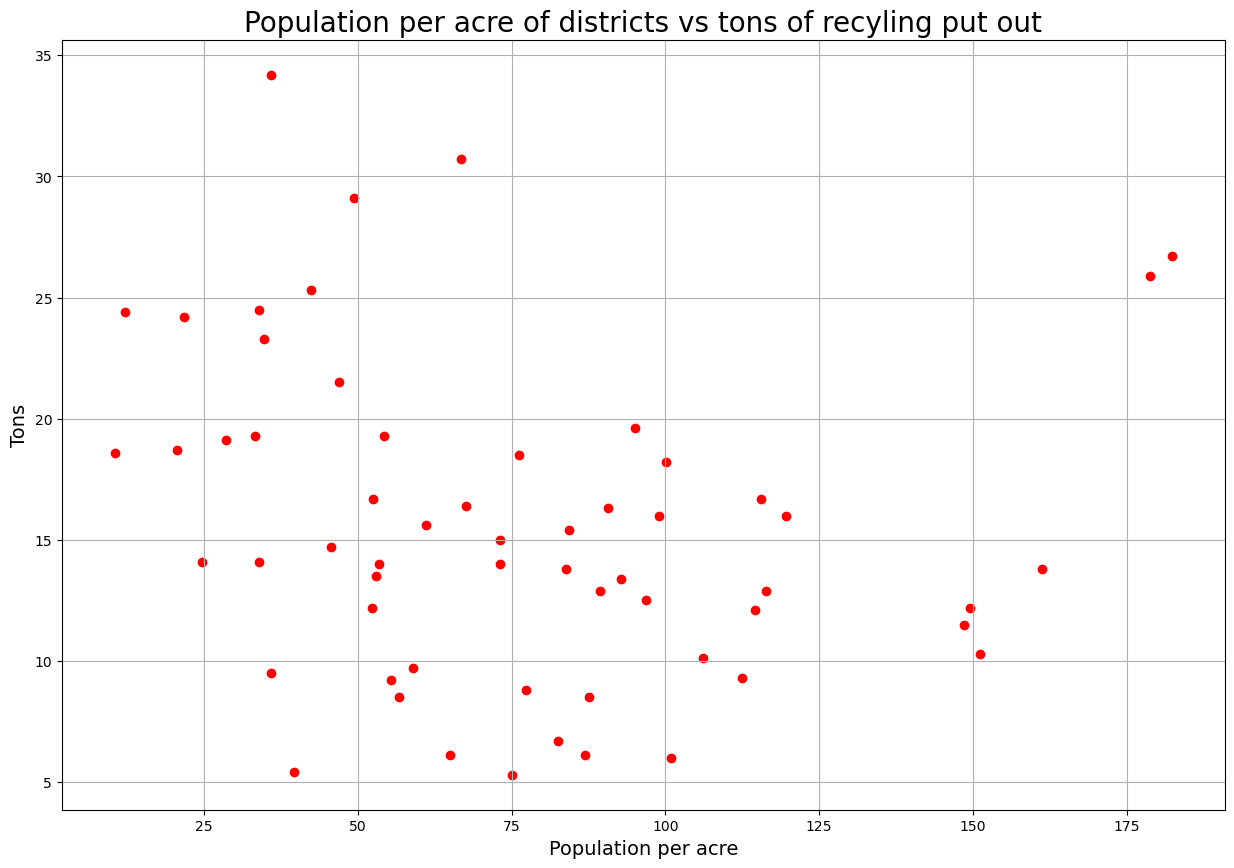

In [55]:
plt.figure(figsize=(15,10))
plt.scatter(data["Population/acre"],data["MGP tons"],color="red",marker="o")
plt.xlabel("Population per acre",fontsize=14)
plt.ylabel("Tons",fontsize=14)
plt.title("Population per acre of districts vs tons of recyling put out", fontsize=20)
plt.grid(True)
plt.savefig('Popperacre_vs_tons')
plt.show()

In [57]:
data=data[["Median Age","Diversion rate (%)"]]

cov_matrix = np.cov(data["Median Age"], data["Diversion rate (%)"])
covariance = cov_matrix[0, 1]
print(f"Covariance: {covariance}")

# Correlation
correlation = np.corrcoef(data["Median Age"], data["Diversion rate (%)"])[0, 1]
print(f"Correlation: {correlation}")

# Linear regression to find R²
X = data["Median Age"].values.reshape(-1, 1)  # Reshape for sklearn
y = data["Diversion rate (%)"].values
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
print(f"R²: {r2}")

Covariance: 4.3612536528345975
Correlation: 0.27459535173401406
R²: 0.07540260719392688


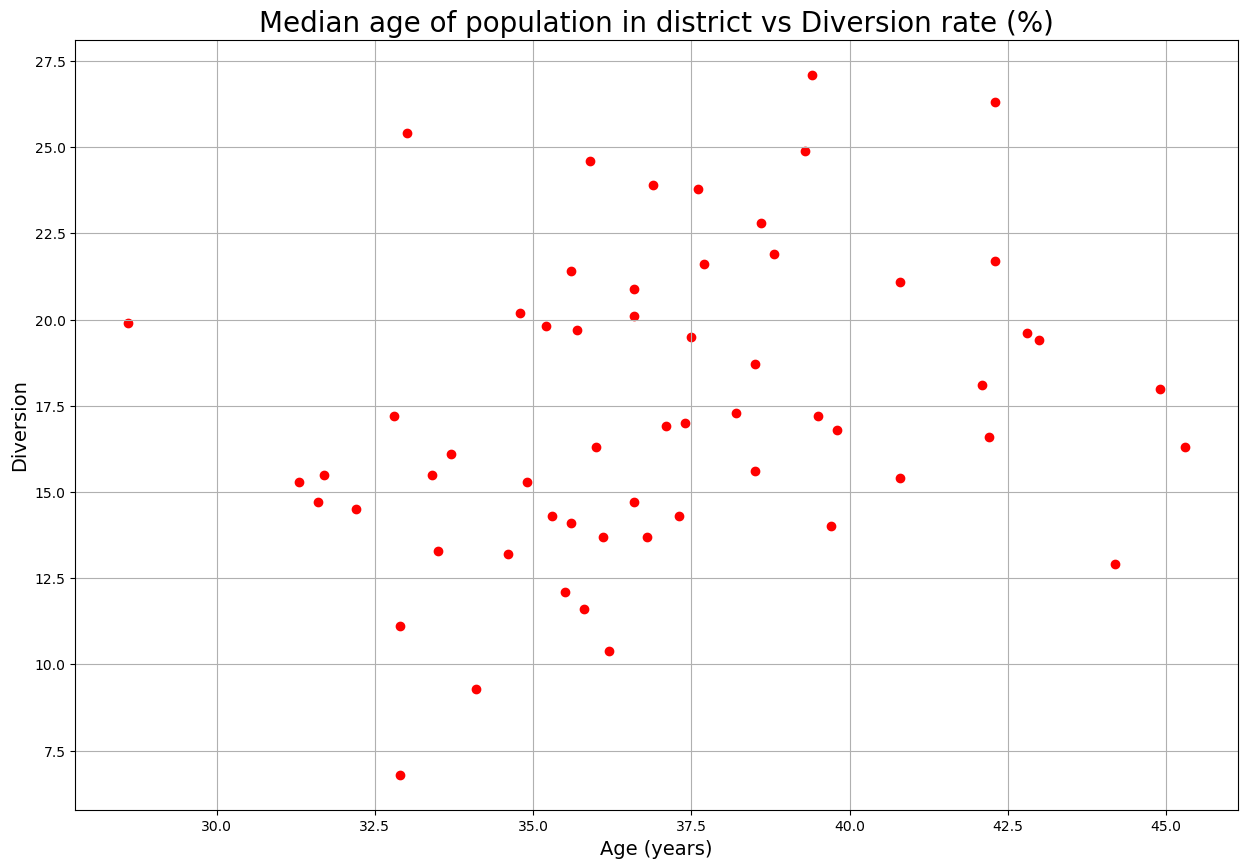

In [30]:
plt.figure(figsize=(15,10))
plt.scatter(data["Median Age"],data["Diversion rate (%)"],color="red",marker="o")
plt.xlabel("Age (years)",fontsize=14)
plt.ylabel("Diversion",fontsize=14)
plt.title("Median age of population in district vs Diversion rate (%)",fontsize=20)
plt.grid(True)
plt.savefig('diversion_rate.png')
plt.show()

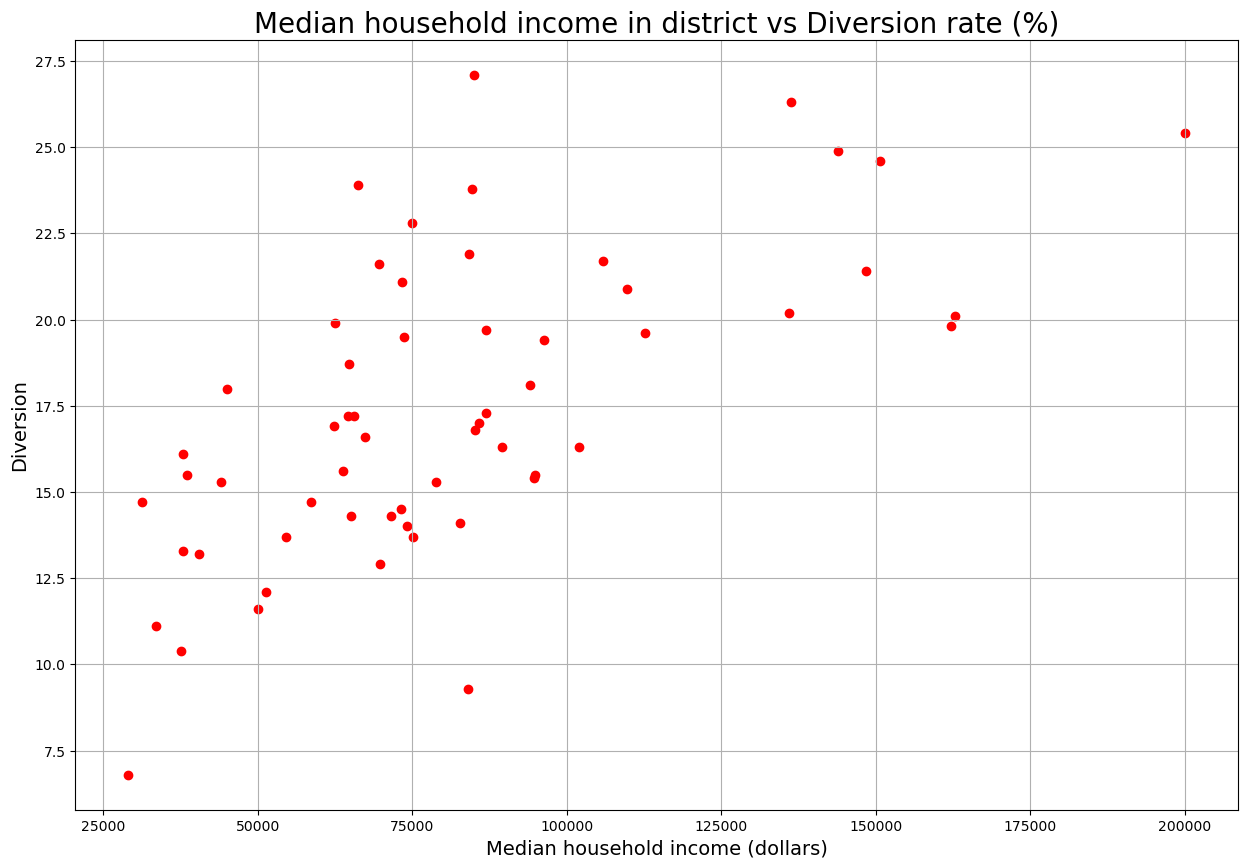

In [62]:
plt.figure(figsize=(15,10))
plt.scatter(data["Median household income (dollars)"],data["Diversion rate (%)"],color="red",marker="o")
plt.xlabel("Median household income (dollars)",fontsize=14)
plt.ylabel("Diversion",fontsize=14)
plt.title("Median household income in district vs Diversion rate (%)",fontsize=20)
plt.grid(True)
plt.savefig('income_diversion_rate.png')
plt.show()

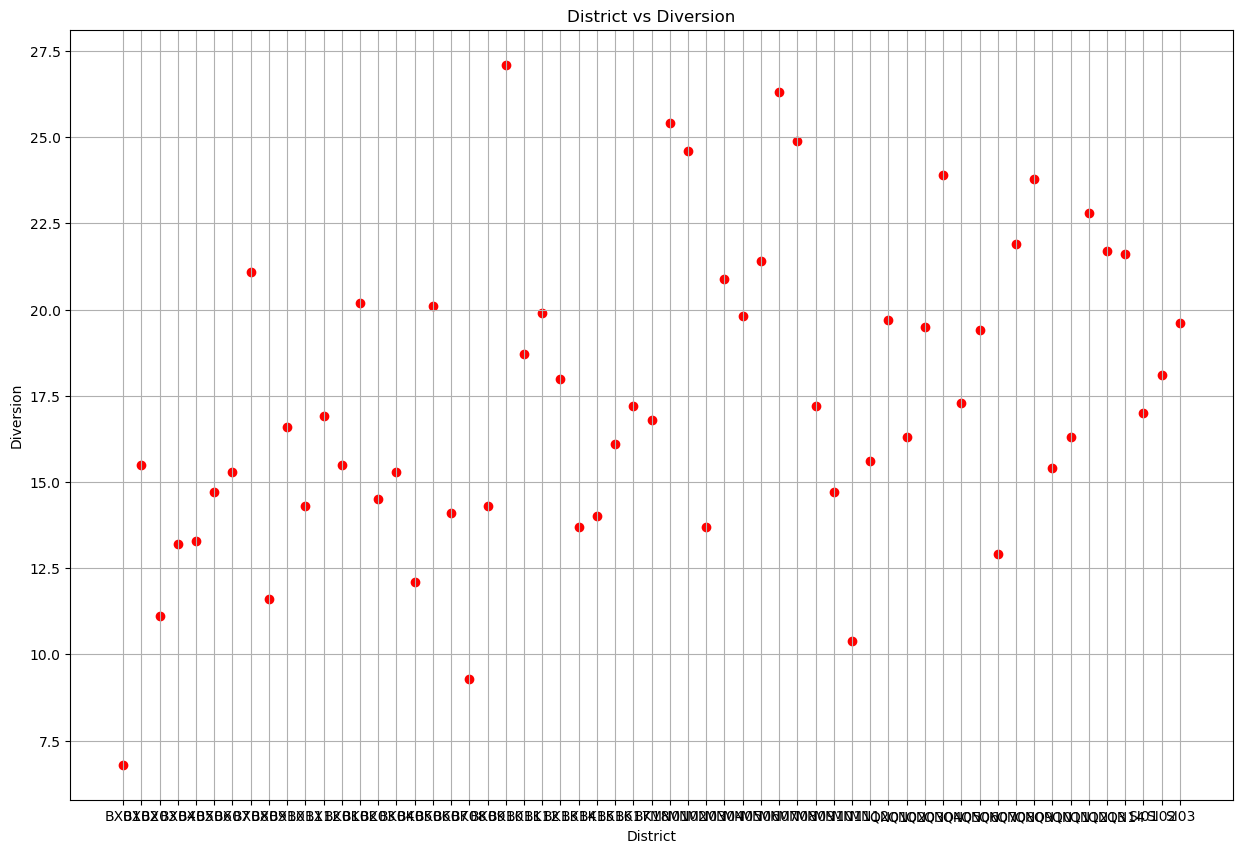

In [395]:
plt.figure(figsize=(15,10))
plt.scatter(data["District"],data["Diversion rate (%)"],color="red",marker="o")
plt.xlabel("District")
plt.ylabel("Diversion")
plt.title("District vs Diversion")
plt.grid(True)
plt.show()

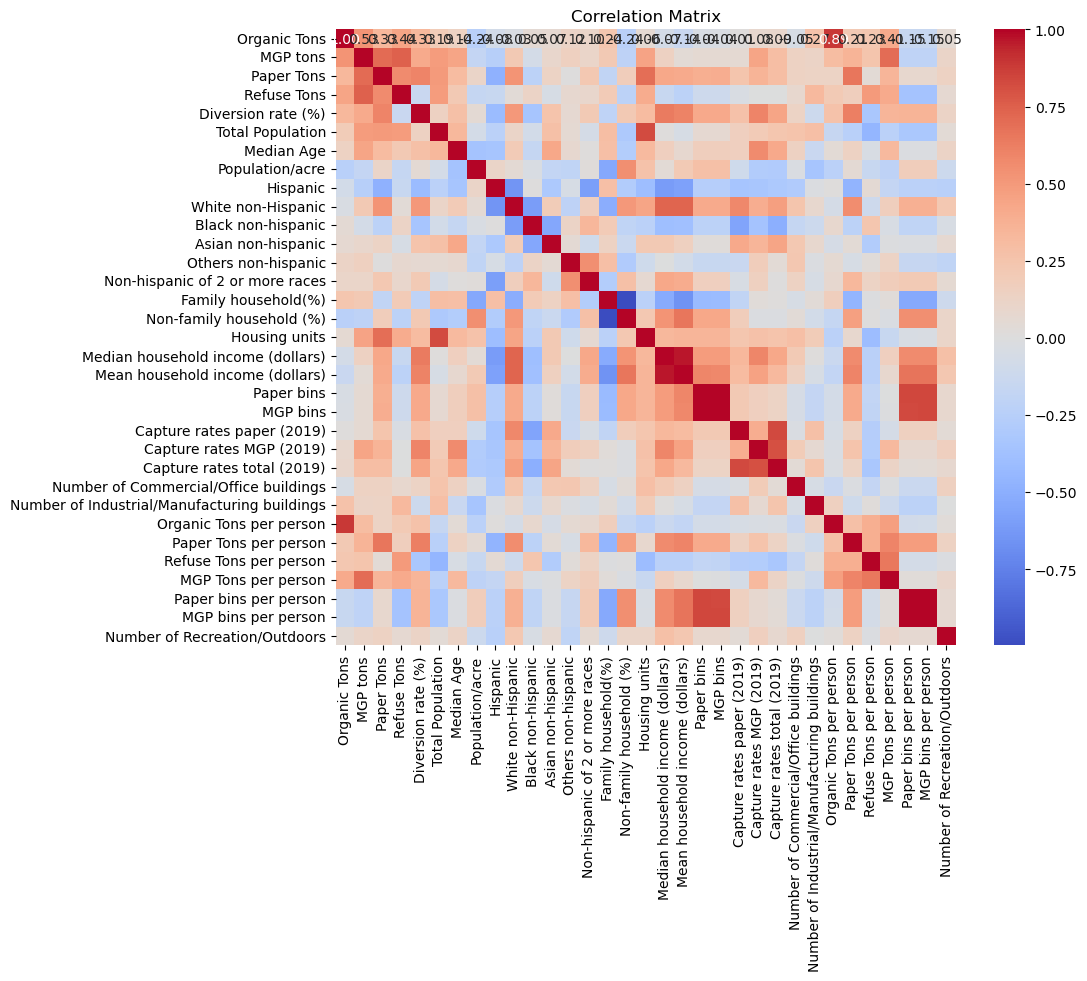

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Filter out non-numeric columns
numeric_data = data.select_dtypes(include='number')  # Select only numeric columns

# Step 2: Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Step 3: Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix')
plt.savefig("Correlation_Matrix.png")
plt.show()

<Figure size 1800x1400 with 0 Axes>

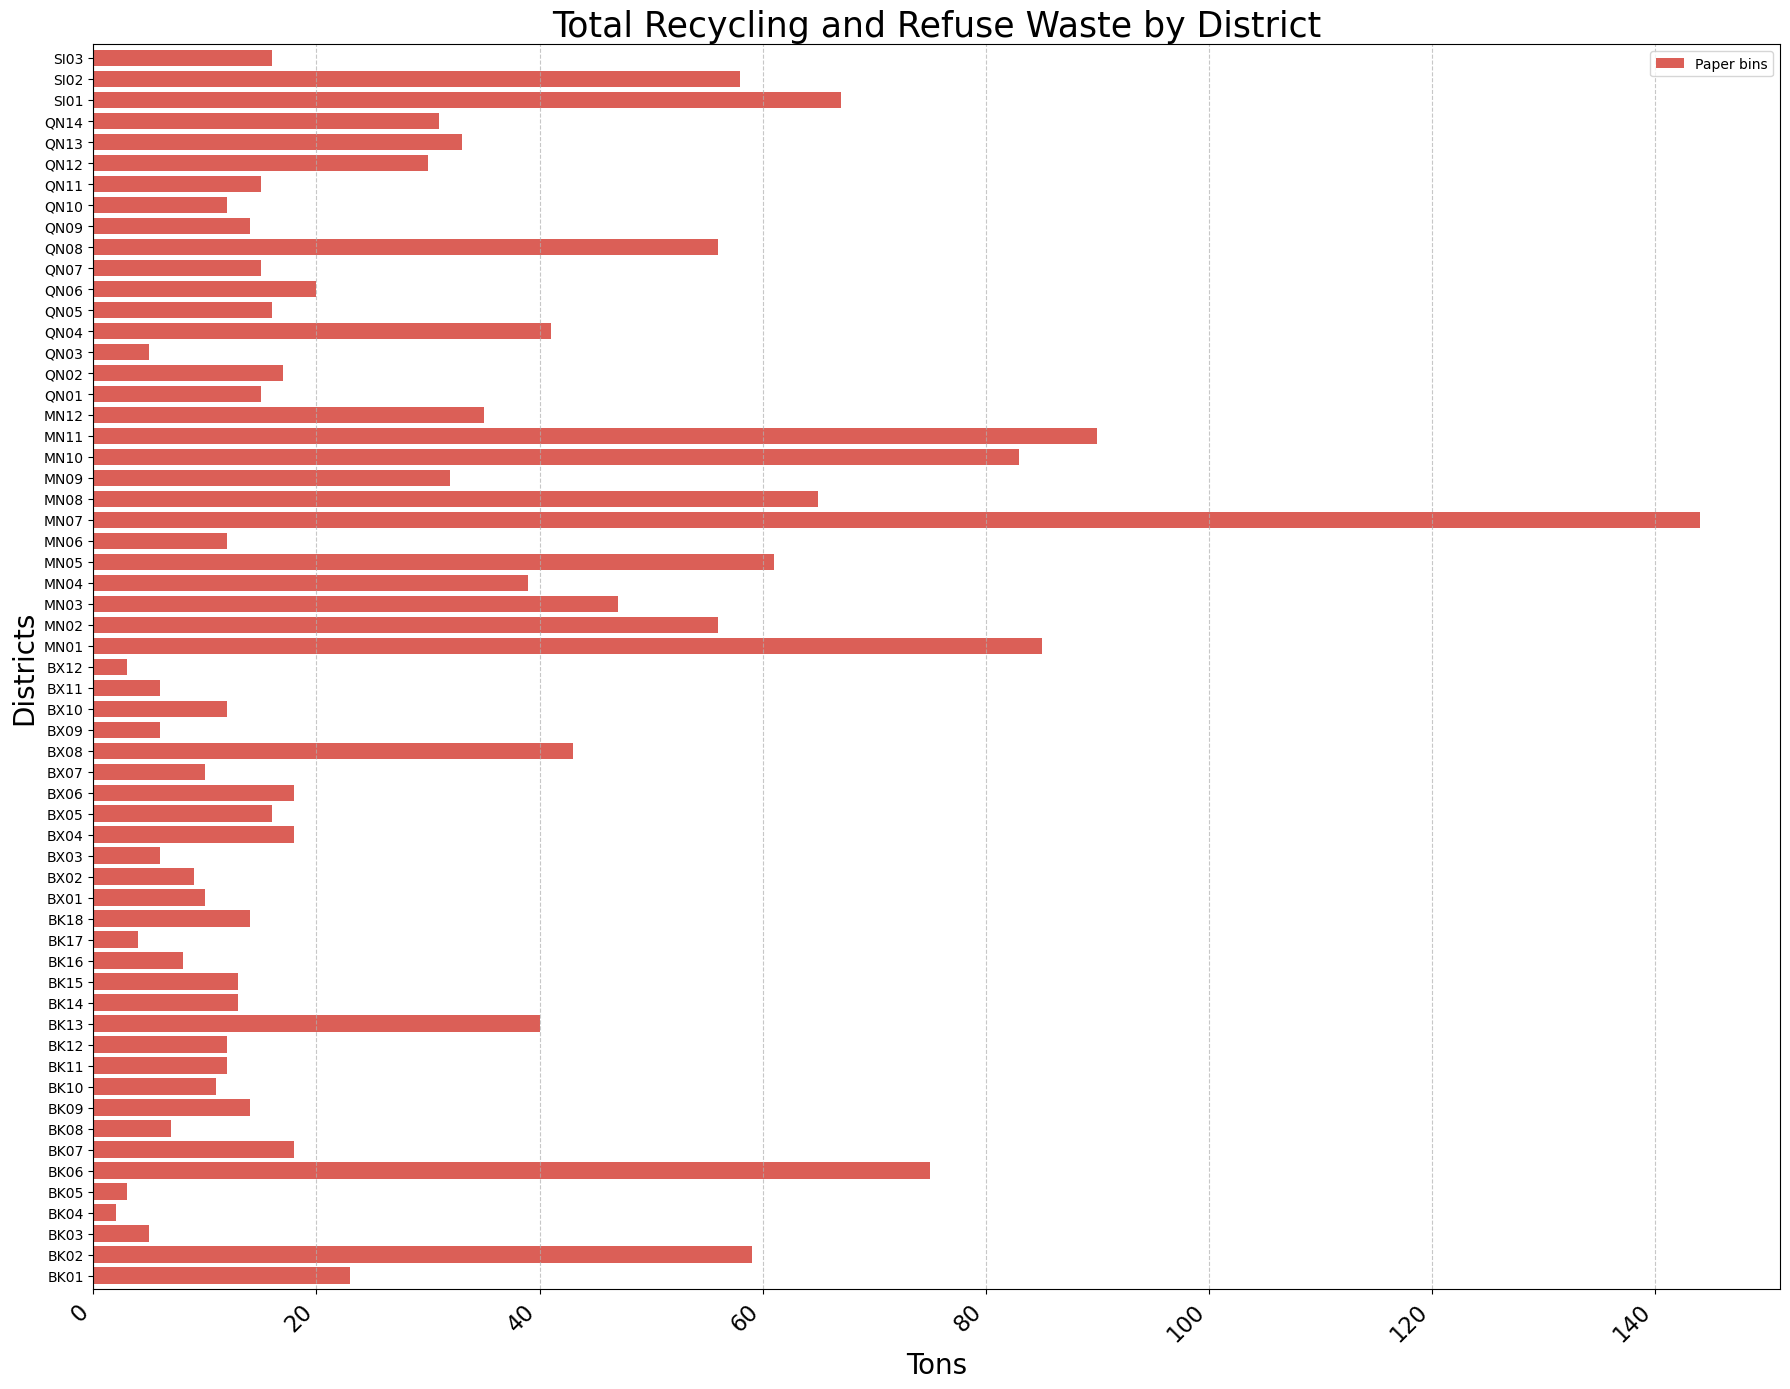

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pastel color palette with 4 colors (one for each category)
pastel_colors = sns.color_palette("hls", n_colors=2)

# Plot the stacked bar chart
plt.figure(figsize=(18, 14))  # Further increased size of the chart

# Plot the bar chart with increased bar thickness and pastel colors
ax = data.groupby('District')[['Paper bins']].sum().plot(
    kind='barh', 
    stacked=True, 
    width=0.8,  # Thinner bars
    figsize=(18, 14),  # Increase figure size for better space
    color=pastel_colors  # Apply pastel colors
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=16)

# Add titles and labels
plt.title('Total Recycling and Refuse Waste by District', fontsize=25)
plt.ylabel('Districts', fontsize=20)
plt.xlabel('Tons', fontsize=20)

# Optional: Add gridlines for easier reading of bar values
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()  # Ensure everything fits nicely
plt.savefig('Bins by district.png')
plt.show()

<Figure size 1800x1400 with 0 Axes>

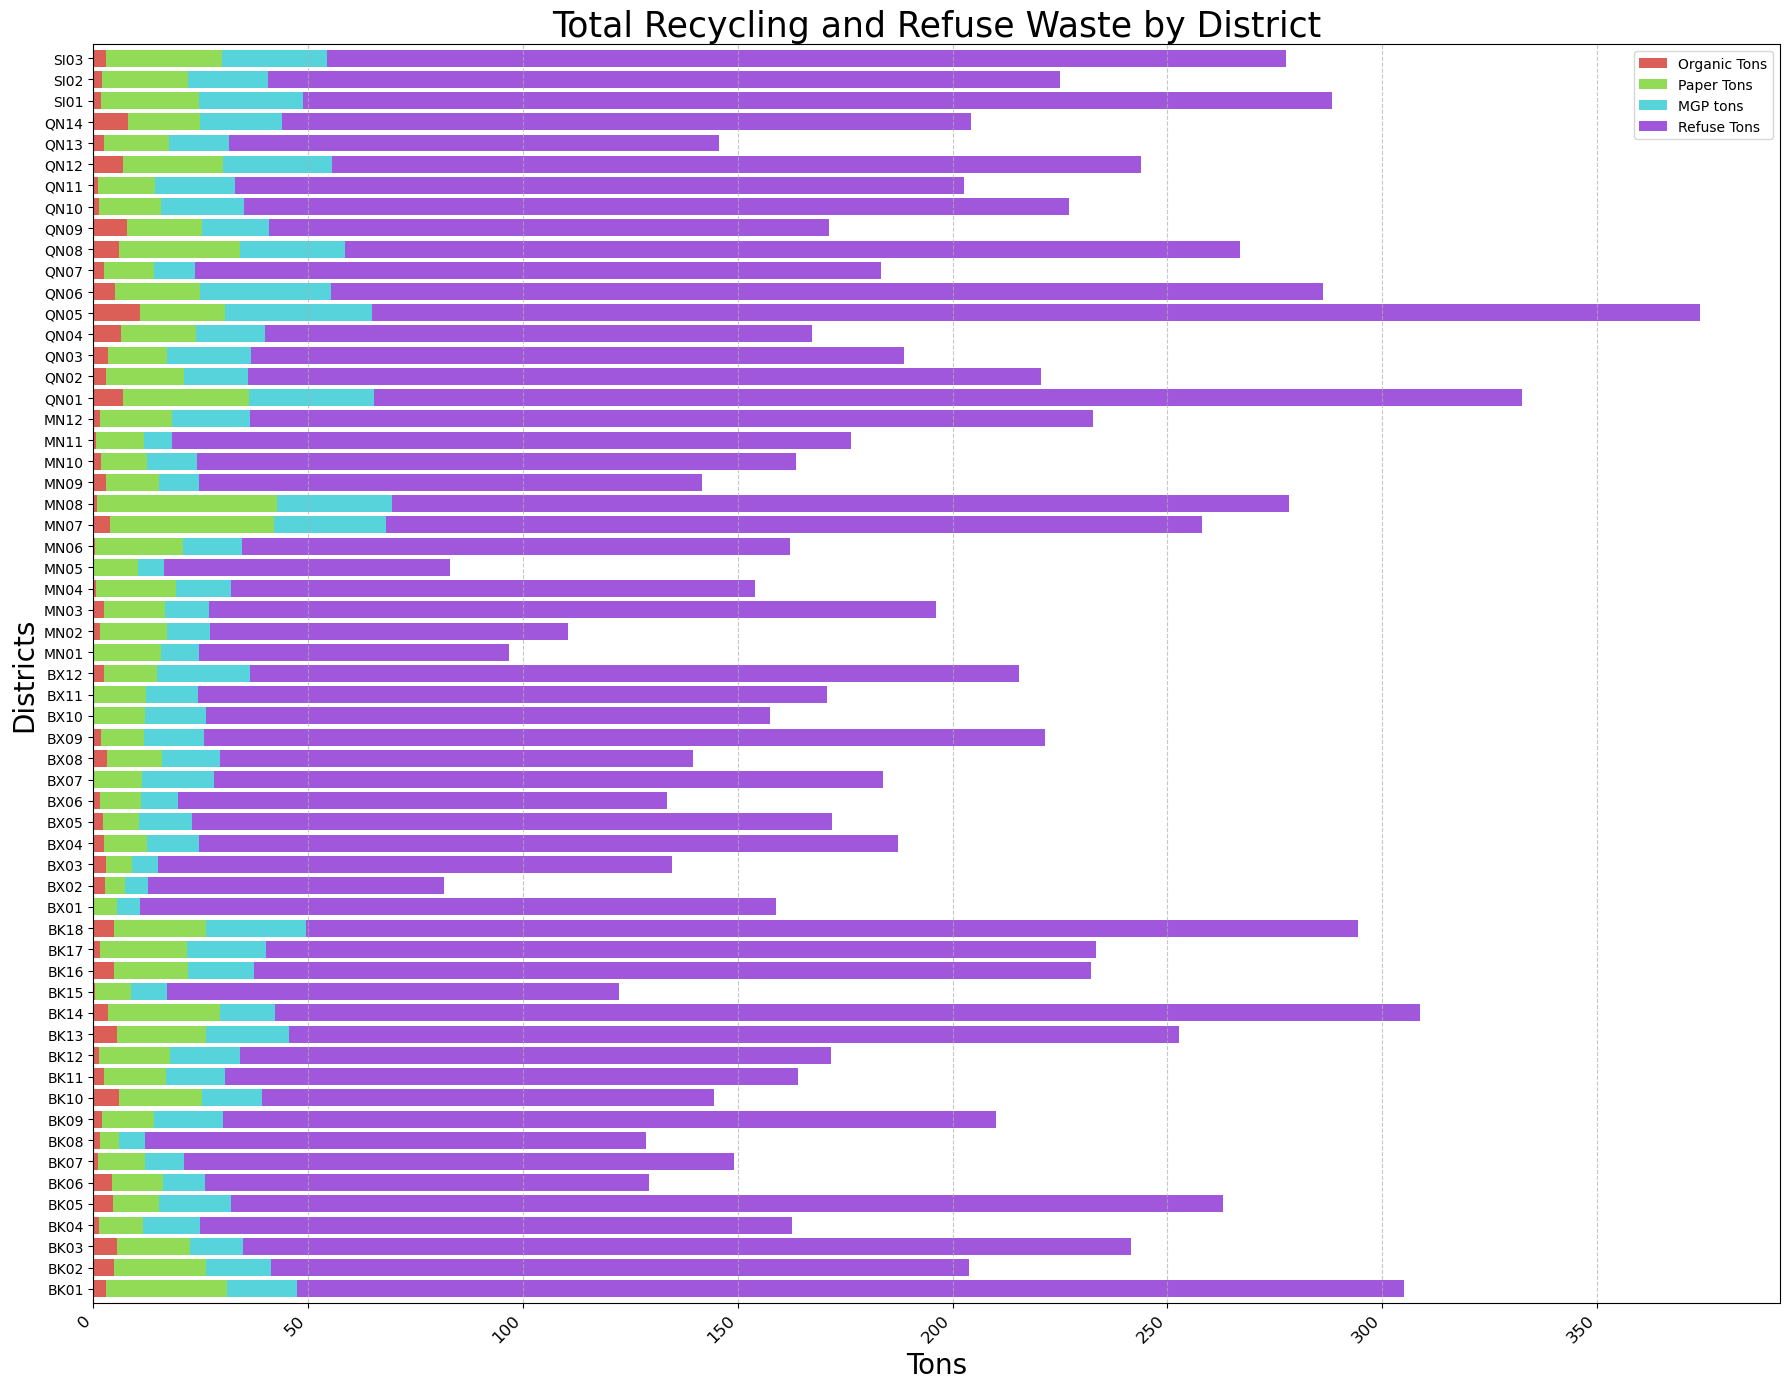

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pastel color palette with 4 colors (one for each category)
pastel_colors = sns.color_palette("hls", n_colors=4)

# Plot the stacked bar chart
plt.figure(figsize=(18, 14))  # Further increased size of the chart

# Plot the bar chart with increased bar thickness and pastel colors
ax = data.groupby('District')[['Organic Tons', 'Paper Tons', 'MGP tons', 'Refuse Tons']].sum().plot(
    kind='barh', 
    stacked=True, 
    width=0.8,  # Thinner bars
    figsize=(18, 14),  # Increase figure size for better space
    color=pastel_colors  # Apply pastel colors
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add titles and labels
plt.title('Total Recycling and Refuse Waste by District', fontsize=25)
plt.ylabel('Districts', fontsize=20)
plt.xlabel('Tons', fontsize=20)

# Optional: Add gridlines for easier reading of bar values
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()  # Ensure everything fits nicely
plt.savefig('waste by district.png')
plt.show()


In [157]:
captures=capture_rates(district_dfs)    
data
data["Capture rates paper (2019)"] = captures[0]
data["Capture rates MGP (2019)"] = captures[1]
data["Capture rates total (2019)"] = captures[2]
data["Number of Commercial/Office buildings"]=df_num_commercial_bldgs
data["Number of Industrial/Manufacturing buildings"]=df_num_industrial_bldgs
data["Number of Recreation/Outdoors"]=df_num_rec_bldgs
data["Organic Tons per person"] = data["Organic Tons"]/data["Total Population"]
data["Paper Tons per person"] = data["Paper Tons"]/data["Total Population"]
data["Refuse Tons per person"] = data["Refuse Tons"]/data["Total Population"]
data["MGP Tons per person"] = data["MGP tons"]/data["Total Population"]
data["Paper bins per person"] = data["Paper bins"]/data["Total Population"]
data["MGP bins per person"] = data["MGP bins"]/data["Total Population"]

data
data.to_csv('DemographicsTable.csv', index=False)

/opt/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


<Figure size 1800x1400 with 0 Axes>

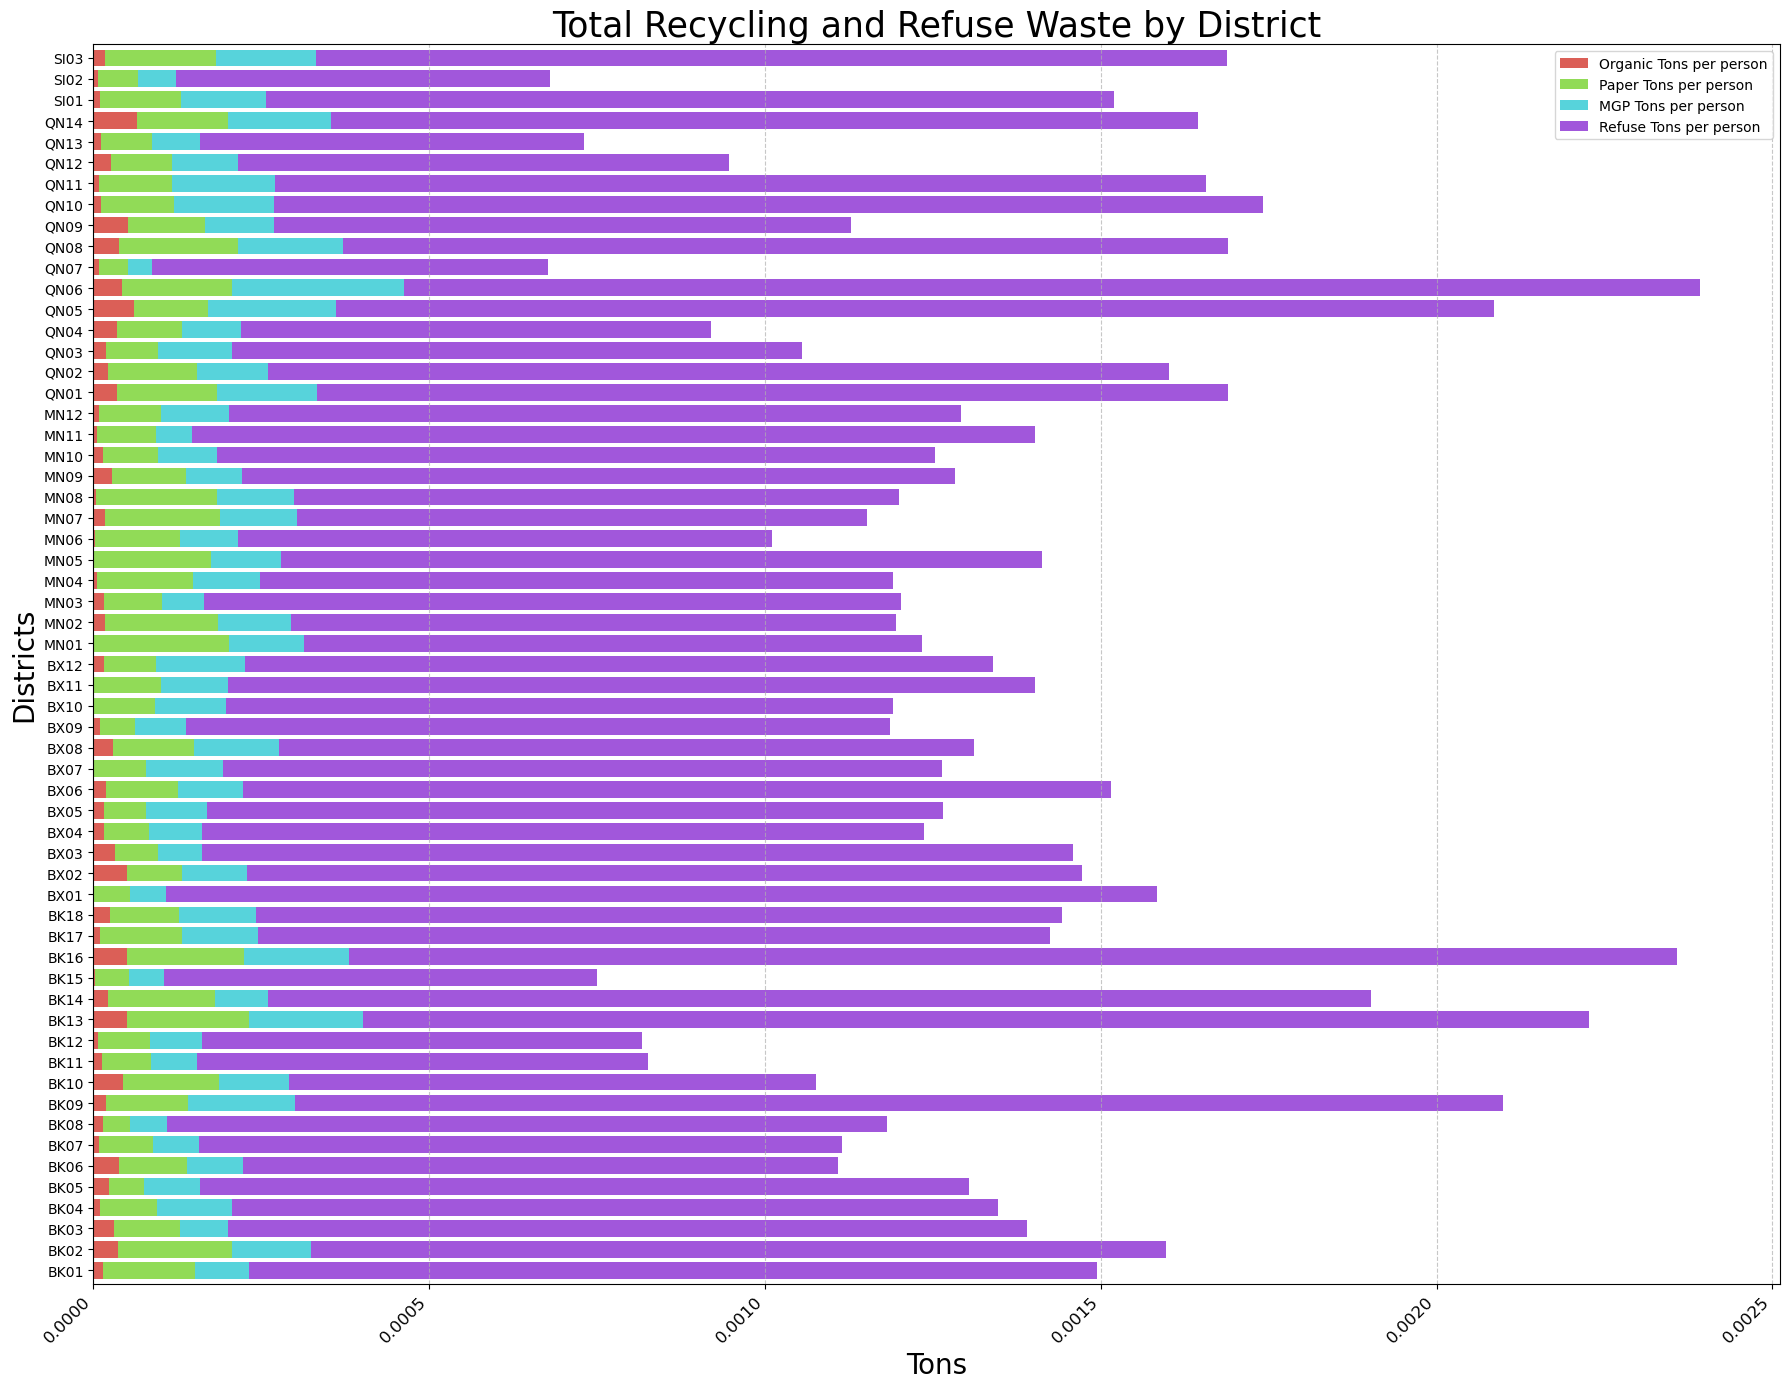

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pastel color palette with 4 colors (one for each category)
pastel_colors = sns.color_palette("hls", n_colors=4)

# Plot the stacked bar chart
plt.figure(figsize=(18, 14))  # Further increased size of the chart

# Plot the bar chart with increased bar thickness and pastel colors
ax = data.groupby('District')[['Organic Tons per person', 'Paper Tons per person', 'MGP Tons per person', 'Refuse Tons per person']].sum().plot(
    kind='barh', 
    stacked=True, 
    width=0.8,  # Thinner bars
    figsize=(18, 14),  # Increase figure size for better space
    color=pastel_colors  # Apply pastel colors
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add titles and labels
plt.title('Total Recycling and Refuse Waste by District', fontsize=25)
plt.ylabel('Districts', fontsize=20)
plt.xlabel('Tons', fontsize=20)

# Optional: Add gridlines for easier reading of bar values
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()  # Ensure everything fits nicely
plt.savefig('waste by district.png')
plt.show()

In [143]:
numeric_data = data.select_dtypes(include='number')  # Select only numeric columns

# Step 2: Calculate the correlation matrix
corr_matrix = numeric_data.corr()
corr_matrix



,Organic Tons,MGP tons,Paper Tons,Refuse Tons,Diversion rate (%),Total Population,Median Age,Population/acre,Hispanic,White non-Hispanic,...,Capture rates total (2019),Number of Commercial/Office buildings,Number of Industrial/Manufacturing buildings,Organic Tons per person,Paper Tons per person,Refuse Tons per person,MGP Tons per person,Paper bins per person,MGP bins per person,Number of Recreation/Outdoors
Organic Tons,1.000000,0.526681,0.332312,0.440183,0.331654,0.192632,0.140032,-0.243896,-0.083745,-0.030203,...,0.091970,-0.046689,0.266293,0.889403,0.214190,0.232798,0.410798,-0.152703,-0.150072,0.053868
MGP tons,0.526681,1.000000,0.710954,0.745094,0.409125,0.485198,0.442927,-0.176949,-0.254660,0.213528,...,0.297796,0.139862,0.121496,0.299456,0.356717,0.248190,0.699335,-0.208133,-0.206791,0.111263
Paper Tons,0.332312,0.710954,1.000000,0.566486,0.599294,0.494849,0.313033,0.110860,-0.484821,0.528082,...,0.292109,0.134070,0.131388,0.133918,0.660262,0.042676,0.352262,0.084780,0.087018,0.137186
Refuse Tons,0.440183,0.745094,0.566486,1.000000,-0.143098,0.485128,0.218235,-0.169793,-0.147258,0.039929,...,-0.002581,0.080752,0.322291,0.211942,0.172624,0.500594,0.410339,-0.361059,-0.360525,0.066519
Diversion rate (%),0.331654,0.409125,0.599294,-0.143098,1.000000,0.144833,0.274595,0.048326,-0.417721,0.504285,...,0.443427,0.129143,-0.122715,0.263498,0.624545,-0.327841,0.346168,0.353830,0.355873,0.125943
Total Population,0.192632,0.485198,0.494849,0.485128,0.144833,1.000000,0.332574,-0.069431,-0.230022,0.114008,...,0.241044,0.251092,0.289297,-0.160330,-0.241080,-0.457384,-0.227221,-0.324993,-0.323631,0.045491
Median Age,0.140032,0.442927,0.313033,0.218235,0.274595,0.332574,1.000000,-0.359370,-0.343737,0.200573,...,0.422051,0.148803,-0.146011,0.045873,0.138171,-0.041445,0.323932,-0.019856,-0.017859,0.124279
Population/acre,-0.243896,-0.176949,0.110860,-0.169793,0.048326,-0.069431,-0.359370,1.000000,0.110903,0.051204,...,-0.289436,-0.025485,-0.345931,-0.226518,0.053253,-0.149193,-0.215689,0.176931,0.178124,-0.121001
Hispanic,-0.083745,-0.254660,-0.484821,-0.147258,-0.417721,-0.230022,-0.343737,0.110903,1.000000,-0.653650,...,-0.315436,-0.291091,-0.020926,0.013534,-0.468744,0.052047,-0.173468,-0.225634,-0.225924,-0.247905
White non-Hispanic,-0.030203,0.213528,0.528082,0.039929,0.504285,0.114008,0.200573,0.051204,-0.653650,1.000000,...,0.470745,0.247342,0.080408,-0.066829,0.562019,-0.109551,0.171613,0.382081,0.382573,0.224787


In [88]:
df=pd.read_csv("datas/DSNY_Planned_Commercial_Waste_Zones.csv")
df

,Zone,ZONE_NAME,CD,OBJECTID,SHAPE_Area,SHAPE_Length,Multipolygon
0,BX-1,Bronx West,"CD201, CD203, CD204, CD205, CD206, CD207, CD20...",7,4.691138e+08,123275.068028,"MULTIPOLYGON (((-73.8729486044 40.9044410226, ..."
1,BK-1,Brooklyn North,"CD301, CD303, CD304",4,2.678809e+08,101526.076900,"MULTIPOLYGON (((-73.9543955539 40.7391147728, ..."
2,MN-7,Upper Manhattan,"CD109, CD110, CD112",45,1.589437e+08,88595.869784,"MULTIPOLYGON (((-73.9264055694 40.8776214764, ..."
3,SI-1,Staten Island,"CD501, CD502, CD503, and Staten Island Gateway...",52,1.623923e+09,330423.858814,"MULTIPOLYGON (((-74.0822127287 40.6482801625, ..."
4,QN-3,Queens Northeast,"CD407, CD408, CD411, and Flushing Meadows Coro...",46,8.441408e+08,200011.123566,"MULTIPOLYGON (((-73.8204991996 40.8010114678, ..."
5,QN-1,Queens West,"CD401, CD402, and Roosevelt Island",22,3.177431e+08,148494.226515,"MULTIPOLYGON (((-73.9064731465 40.7901811754, ..."
6,BK-5,Brooklyn South,"CD313, CD314, CD315",2,3.020145e+08,189355.624754,"MULTIPOLYGON (((-73.9598610324 40.6556347897, ..."
7,QN-4,Queens Southeast,"CD409, CD410, CD412, CD413, CD414, JFK Interna...",12,1.408539e+09,673800.881945,"MULTIPOLYGON (((-73.7271887626 40.7116926177, ..."
8,MN-1B,Manhattan Southwest,CD102,88,3.772317e+07,34902.582596,"MULTIPOLYGON (((-74.0077911614 40.7419708451, ..."
9,BK-2,Brooklyn West,"CD302, CD306, CD307",25,2.689682e+08,206559.013071,"MULTIPOLYGON (((-73.9723203202 40.7090828838, ..."


In [80]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import ShuffleSplit, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
import numpy as np

# Example setup
X = data[["Paper Tons per person","Mean household income (dollars)","Paper bins per person","Population/acre"]]   # Replace with your dataset
y = data["Diversion rate (%)"]     # Replace with your target

# ShuffleSplit and pipeline
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

# Function to compute mutual information
def compute_mutual_information(X, y):
    mi = mutual_info_regression(X, y, random_state=42)
    return mi

# Run mutual information
mutual_info_scores = compute_mutual_information(X, y)
print("Mutual Information Scores:", mutual_info_scores)

Mutual Information Scores: [0.32516003 0.23488858 0.         0.04621826]


In [81]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Grid search over random forest hyperparameters
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=cv, scoring='r2', n_jobs=-1)
grid_search.fit(X, y)

print("Best Random Forest Parameters:", grid_search.best_params_)

Best Random Forest Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 150}


In [82]:
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.pipeline import Pipeline

anova_pipeline = Pipeline([
    ('anova', SelectKBest(score_func=f_regression, k='all')),
    ('model', RandomForestRegressor(random_state=42))
])

# Fit pipeline with cross-validation
param_grid = {
    'model__n_estimators': [50, 100],
    'model__max_depth': [None, 10]
}

grid_search = GridSearchCV(anova_pipeline, param_grid, cv=cv, scoring='r2', n_jobs=-1)
grid_search.fit(X, y)

print("Best ANOVA Pipeline Parameters:", grid_search.best_params_)

Best ANOVA Pipeline Parameters: {'model__max_depth': 10, 'model__n_estimators': 100}


In [84]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Perform ANOVA F-test
F_values, p_values = f_classif(X_train, y_train)

# Create a DataFrame to show F-statistics and p-values
anova_results = pd.DataFrame({'Feature': X.columns, 'F-statistic': F_values, 'p-value': p_values})

# Filter significant features based on p-value threshold of 0.05
significant_features = anova_results[anova_results['p-value'] < 0.05]

# Display the results
print("ANOVA Results:")
print(anova_results)
print("\nSignificant Features (p-value < 0.05):")
print(significant_features)

ANOVA Results:
                           Feature  F-statistic   p-value
0            Paper Tons per person    10.507546  0.016542
1  Mean household income (dollars)    17.923973  0.006015
2            Paper bins per person     5.649104  0.050994
3                  Population/acre     3.409113  0.119341

Significant Features (p-value < 0.05):
                           Feature  F-statistic   p-value
0            Paper Tons per person    10.507546  0.016542
1  Mean household income (dollars)    17.923973  0.006015


In [83]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)

# Fit a simple linear regression on interaction terms
model = LinearRegression()
grid_search = GridSearchCV(model, {}, cv=cv, scoring='r2', n_jobs=-1)
grid_search.fit(X_poly, y)

print("Linear Model with Interaction Effects Score:", grid_search.best_score_)

Linear Model with Interaction Effects Score: 0.11651942829758248


In [423]:
import statsmodels.api as sm

# Prepare data for multiple regression model
X = data[['Mean household income (dollars)', 'Population/acre', 'Paper bins']]  # Independent variables
X = sm.add_constant(X)  # Adds a constant term (intercept) to the model
y = data['Diversion rate (%)']  # Dependent variable

# Fit the model
model = sm.OLS(y, X).fit()

# Get model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     Diversion rate (%)   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                     11.49
Date:                Mon, 06 Jan 2025   Prob (F-statistic):           5.91e-06
Time:                        18:21:36   Log-Likelihood:                -155.89
No. Observations:                  59   AIC:                             319.8
Df Residuals:                      55   BIC:                             328.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

Linear Regression R²: 0.63


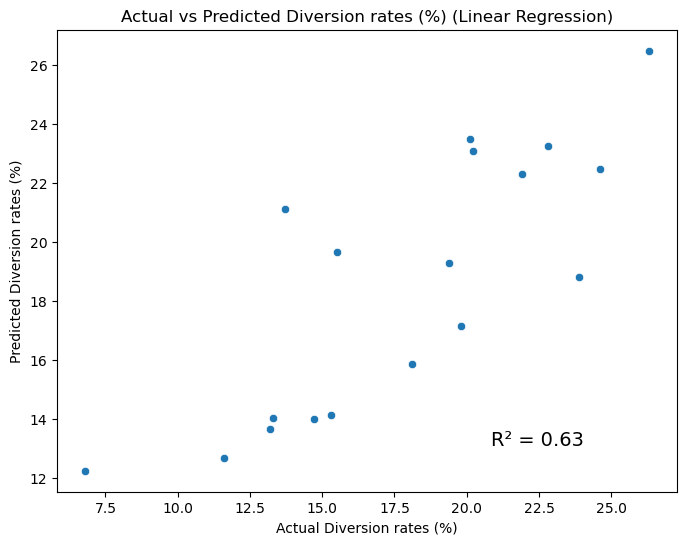

In [575]:


# Example dataset (replace this with your actual dataset)
# df should be a DataFrame with features and a target variable like 'Recycling tons'
df=data
# Define independent variables (features) and target variable (y)
X = df[['Median household income (dollars)', 'MGP tons','Paper Tons','Population/acre', 'Paper bins','MGP bins','Family household(%)','White non-Hispanic','Housing units']]  # Example feature columns
y = df['Diversion rate (%)']  # Example target column

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
#print(f"Mean Squared Error: {mse:.2f}")
print(f"Linear Regression R²: {model.score(X_test, y_test):.2f}")
r2 = model.score(X_test, y_test)

# Visualize the predictions vs actual values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Diversion rates (%)')
plt.ylabel('Predicted Diversion rates (%)')
plt.title('Actual vs Predicted Diversion rates (%) (Linear Regression)')

plt.annotate(f'R² = {r2:.2f}', 
             xy=(0.7, 0.1), 
             xycoords='axes fraction', 
             fontsize=14, 
             color='black')
plt.savefig('Lin_Reg_plot.png')
plt.show()

In [495]:


# Define the SVM model (Support Vector Regression)
svm_model = SVR()

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Type of kernel
    'gamma': ['scale', 'auto']  # Kernel coefficient
}

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='r2', n_jobs=-1)

# Fit the model to find the best parameters
grid_search.fit(X, y)

# Print the best parameters and best score
print("Best parameters: ", grid_search.best_params_)
print("Best R² score from GridSearchCV: ", grid_search.best_score_)

Best parameters:  {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best R² score from GridSearchCV:  -0.050663833193103455


Random forest R²: 0.57


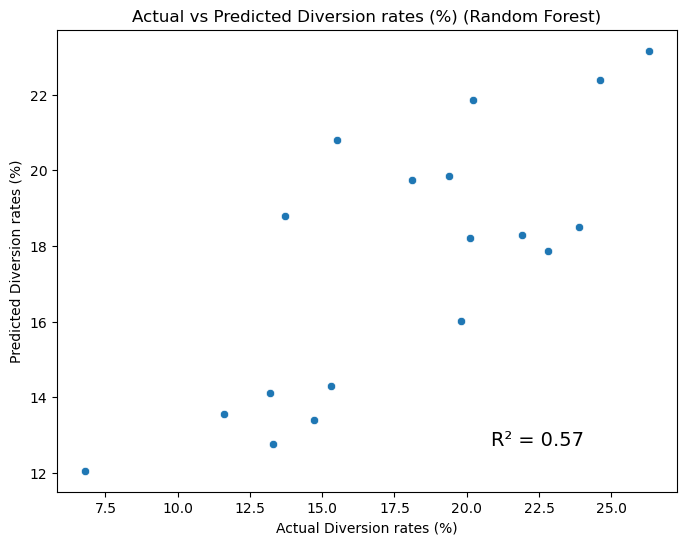

In [577]:

# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
#print(f"Random Forest Mean Squared Error: {mse_rf:.2f}")
print(f"Random forest R²: {rf_model.score(X_test, y_test):.2f}")

r2 = rf_model.score(X_test, y_test)


# Visualize predictions vs actual values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.xlabel('Actual Diversion rates (%)')
plt.ylabel('Predicted Diversion rates (%)')
plt.title('Actual vs Predicted Diversion rates (%) (Random Forest)')

plt.annotate(f'R² = {r2:.2f}', 
             xy=(0.7, 0.1), 
             xycoords='axes fraction', 
             fontsize=14, 
             color='black')
plt.savefig('Rand_forest_plot.png')

plt.show()


In [566]:
print(f"Linear Regression R²: {model.score(X_test, y_test):.2f}")
print(f"Random forest R²: {rf_model.score(X_test, y_test):.2f}")

Linear Regression R²: 0.63
Random forest R²: 0.57


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


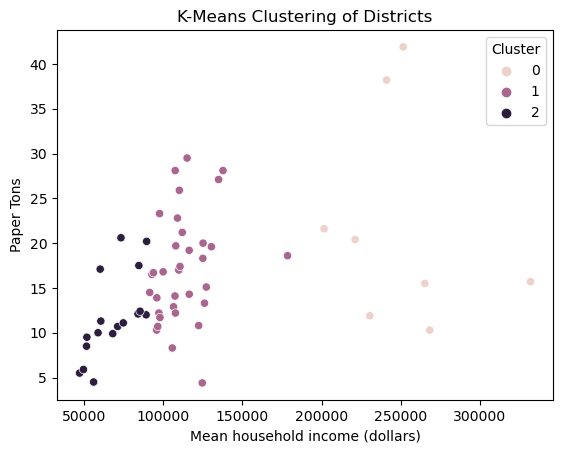

In [449]:
from sklearn.cluster import KMeans
df=data
# Select features for clustering
X_cluster = df[['MGP tons', 'Population/acre', 'Mean household income (dollars)', 'Paper bins']]

X_cluster = X_cluster.dropna()

# Fit the KMeans model
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = pd.Series(kmeans.fit_predict(X_cluster), index=X_cluster.index)

# Visualize clusters
sns.scatterplot(x='Mean household income (dollars)', y='Paper Tons', hue='Cluster', data=df)
plt.title('K-Means Clustering of Districts')
plt.show()


# Visualize clusters
#plt.figure(figsize=(10, 8))
#sns.scatterplot(x='Income', y='Recycling tons', hue='Cluster', data=df, palette='Set2')
#plt.title('Clusters of Districts based on Income and Recycling Tons')
#plt.show()

In [88]:
pluto_data=pd.read_csv("datas/pluto_24v4.csv")


/var/folders/x8/hv6lnsx5209d4m84b842j095n23ctf/T/ipykernel_85495/2766947876.py:1: DtypeWarning: Columns (21,22,24,26,28,65,66,88) have mixed types. Specify dtype option on import or set low_memory=False.
  pluto_data=pd.read_csv("datas/pluto_24v4.csv")


In [87]:
data

,borough,block,lot,cd,bct2020,bctcb2020,ct2010,cb2010,schooldist,council,...,appbbl,appdate,plutomapid,firm07_flag,pfirm15_flag,version,dcpedited,latitude,longitude,notes
0,QN,4703,20,407.0,4102900.0,4.102900e+10,1029.0,1019.0,25.0,19.0,...,4.047030e+09,03/25/2002,1,NaN,NaN,24v4,NaN,40.783418,-73.810633,NaN
1,QN,4684,28,407.0,4102900.0,4.102900e+10,1029.0,1018.0,25.0,19.0,...,NaN,NaN,1,NaN,NaN,24v4,NaN,40.784503,-73.812320,NaN
2,QN,4703,10,407.0,4102900.0,4.102900e+10,1029.0,1019.0,25.0,19.0,...,NaN,NaN,1,NaN,NaN,24v4,NaN,40.783359,-73.811406,NaN
3,QN,4703,1,407.0,4102900.0,4.102900e+10,1029.0,1019.0,25.0,19.0,...,NaN,NaN,1,NaN,NaN,24v4,NaN,40.783815,-73.811347,NaN
4,QN,4684,21,407.0,4102900.0,4.102900e+10,1029.0,1018.0,25.0,19.0,...,NaN,NaN,1,NaN,NaN,24v4,NaN,40.784212,-73.812317,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858637,MN,2156,46,112.0,1026900.0,1.026900e+10,269.0,2000.0,6.0,10.0,...,NaN,NaN,1,NaN,NaN,24v4,NaN,40.851199,-73.929384,NaN
858638,MN,125,20,101.0,1002100.0,1.002100e+10,21.0,1009.0,2.0,1.0,...,NaN,NaN,2,NaN,NaN,24v4,NaN,40.713286,-74.010136,NaN
858639,BK,1927,49,303.0,3023500.0,3.023500e+10,235.0,1001.0,13.0,33.0,...,3.019270e+09,04/22/2022,2,NaN,NaN,24v4,NaN,40.691867,-73.956843,NaN
858640,BK,6678,35,311.0,3041200.0,3.041200e+10,412.0,2004.0,21.0,44.0,...,NaN,NaN,1,NaN,NaN,24v4,NaN,40.601711,-73.974936,NaN


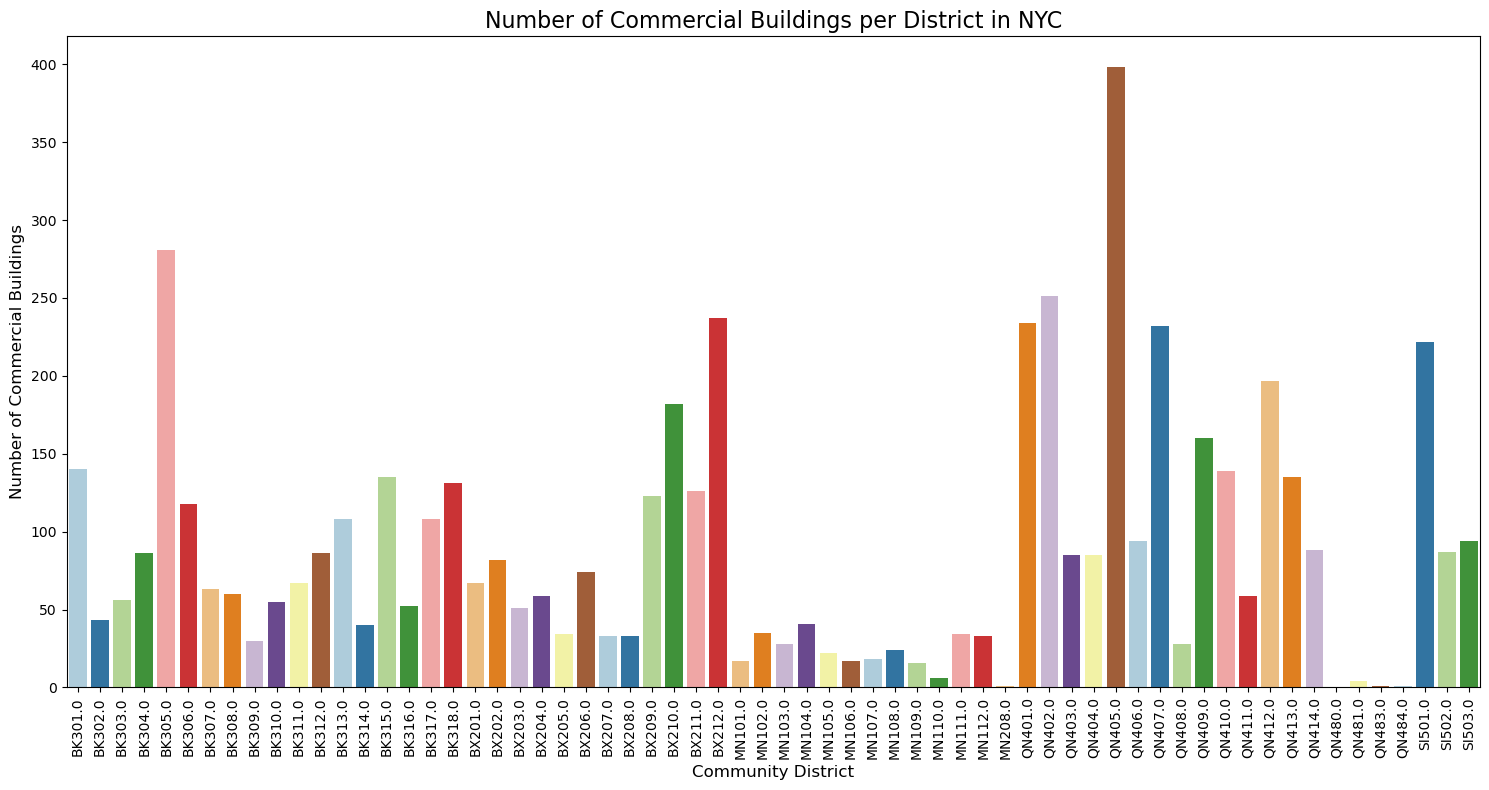

In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the PLUTO dataset
#file_path = "path_to_pluto_file.csv"  # Replace with the path to your PLUTO CSV file
#pluto_data = pd.read_csv(file_path)

# Step 2: Filter for commercial lots (LandUse = 4)
commercial_data = pluto_data[pluto_data['landuse'] == 10]

# Step 3: Group by Borough and Community District and sum the number of buildings
district_commercial_buildings = (
    commercial_data.groupby(['borough', 'cd'])['numbldgs']
    .sum()
    .reset_index()
)

# Step 4: Create a new column for Borough + Community District (e.g., BX01)
district_commercial_buildings['district'] = (
    district_commercial_buildings['borough'] + 
    district_commercial_buildings['cd'].astype(str).str.zfill(2)
)

# Step 5: Sort data for visualization
district_commercial_buildings = district_commercial_buildings.sort_values('district')

# Step 6: Plot a bar chart
plt.figure(figsize=(15, 8))
sns.barplot(
    x='district', 
    y='numbldgs', 
    data=district_commercial_buildings, 
    palette='Paired'
)
plt.xticks(rotation=90)
plt.title('Number of Commercial Buildings per District in NYC', fontsize=16)
plt.xlabel('Community District', fontsize=12)
plt.ylabel('Number of Commercial Buildings', fontsize=12)
plt.tight_layout()

# Save the plot as an image (optional)
plt.savefig('commercial_buildings_per_district.png')

# Show the plot
plt.show()


In [129]:
df1=district_commercial_buildings[district_commercial_buildings["borough"]=="BX"]
df2=district_commercial_buildings[district_commercial_buildings["borough"]=="BK"]
df3=district_commercial_buildings[district_commercial_buildings["borough"]=="MN"]
df4=district_commercial_buildings[district_commercial_buildings["borough"]=="QN"]
df5=district_commercial_buildings[district_commercial_buildings["borough"]=="SI"]

df_num_commercial_bldgs = pd.concat([df1,df2,df3,df4,df5], ignore_index=True)
df_num_commercial_bldgs=df_num_commercial_bldgs[["numbldgs"]]
df_num_commercial_bldgs

,numbldgs
0,307.0
1,136.0
2,122.0
3,211.0
4,232.0
...,...
57,600.0
58,245.0
59,950.0
60,863.0


In [ ]:
Index(['borough', 'block', 'lot', 'cd', 'bct2020', 'bctcb2020', 'ct2010',
       'cb2010', 'schooldist', 'council', 'zipcode', 'firecomp', 'policeprct',
       'healthcenterdistrict', 'healtharea', 'sanitboro', 'sanitdistrict',
       'sanitsub', 'address', 'zonedist1', 'zonedist2', 'zonedist3',
       'zonedist4', 'overlay1', 'overlay2', 'spdist1', 'spdist2', 'spdist3',
       'ltdheight', 'splitzone', 'bldgclass', 'landuse', 'easements',
       'ownertype', 'ownername', 'lotarea', 'bldgarea', 'comarea', 'resarea',
       'officearea', 'retailarea', 'garagearea', 'strgearea', 'factryarea',
       'otherarea', 'areasource', 'numbldgs', 'numfloors', 'unitsres',
       'unitstotal', 'lotfront', 'lotdepth', 'bldgfront', 'bldgdepth', 'ext',
       'proxcode', 'irrlotcode', 'lottype', 'bsmtcode', 'assessland',
       'assesstot', 'exempttot', 'yearbuilt', 'yearalter1', 'yearalter2',
       'histdist', 'landmark', 'builtfar', 'residfar', 'commfar', 'facilfar',
       'borocode', 'bbl', 'condono', 'tract2010', 'xcoord', 'ycoord',
       'zonemap', 'zmcode', 'sanborn', 'taxmap', 'edesignum', 'appbbl',
       'appdate', 'plutomapid', 'firm07_flag', 'pfirm15_flag', 'version',
       'dcpedited', 'latitude', 'longitude', 'notes'],
      dtype='object')

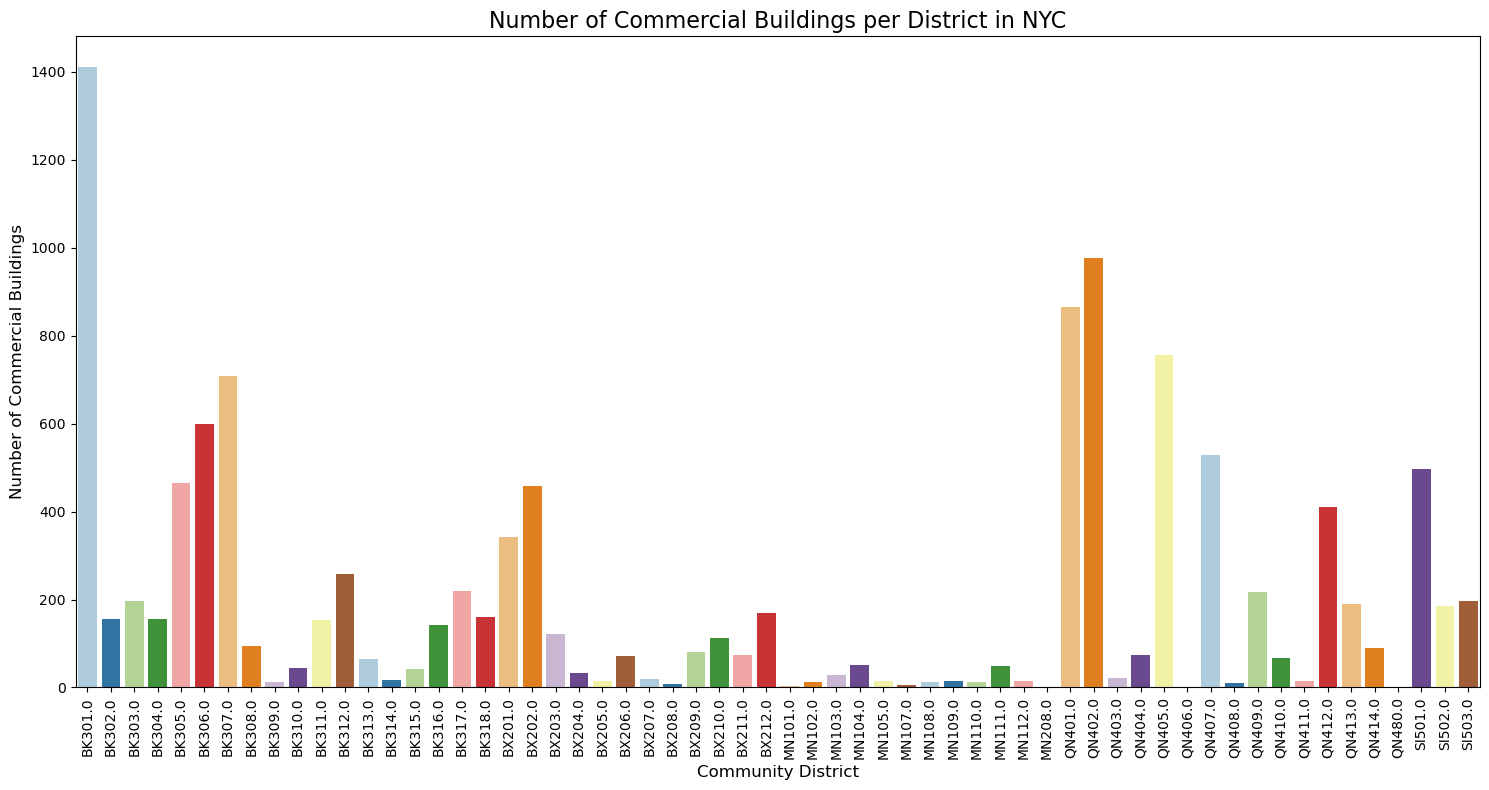

In [132]:
# Step 2: Filter for commercial lots (LandUse = 4)
commercial_data = pluto_data[pluto_data['landuse'] == 6]

# Step 3: Group by Borough and Community District and sum the number of buildings
district_commercial_buildings = (
    commercial_data.groupby(['borough', 'cd'])['numbldgs']
    .sum()
    .reset_index()
)

# Step 4: Create a new column for Borough + Community District (e.g., BX01)
district_commercial_buildings['district'] = (
    district_commercial_buildings['borough'] + 
    district_commercial_buildings['cd'].astype(str).str.zfill(2)
)

# Step 5: Sort data for visualization
district_commercial_buildings = district_commercial_buildings.sort_values('district')

# Step 6: Plot a bar chart
plt.figure(figsize=(15, 8))
sns.barplot(
    x='district', 
    y='numbldgs', 
    data=district_commercial_buildings, 
    palette='Paired'
)
plt.xticks(rotation=90)
plt.title('Number of Commercial Buildings per District in NYC', fontsize=16)
plt.xlabel('Community District', fontsize=12)
plt.ylabel('Number of Commercial Buildings', fontsize=12)
plt.tight_layout()

# Save the plot as an image (optional)
plt.savefig('commercial_buildings_per_district.png')

# Show the plot
plt.show()

In [133]:
df1=district_commercial_buildings[district_commercial_buildings["borough"]=="BX"]
df2=district_commercial_buildings[district_commercial_buildings["borough"]=="BK"]
df3=district_commercial_buildings[district_commercial_buildings["borough"]=="MN"]
df4=district_commercial_buildings[district_commercial_buildings["borough"]=="QN"]
df5=district_commercial_buildings[district_commercial_buildings["borough"]=="SI"]

df_num_industrial_bldgs = pd.concat([df1,df2,df3,df4,df5], ignore_index=True)
df_num_industrial_bldgs=df_num_industrial_bldgs[["numbldgs"]]
df_num_industrial_bldgs

,numbldgs
0,343.0
1,459.0
2,122.0
3,34.0
4,15.0
5,72.0
6,19.0
7,8.0
8,81.0
9,113.0


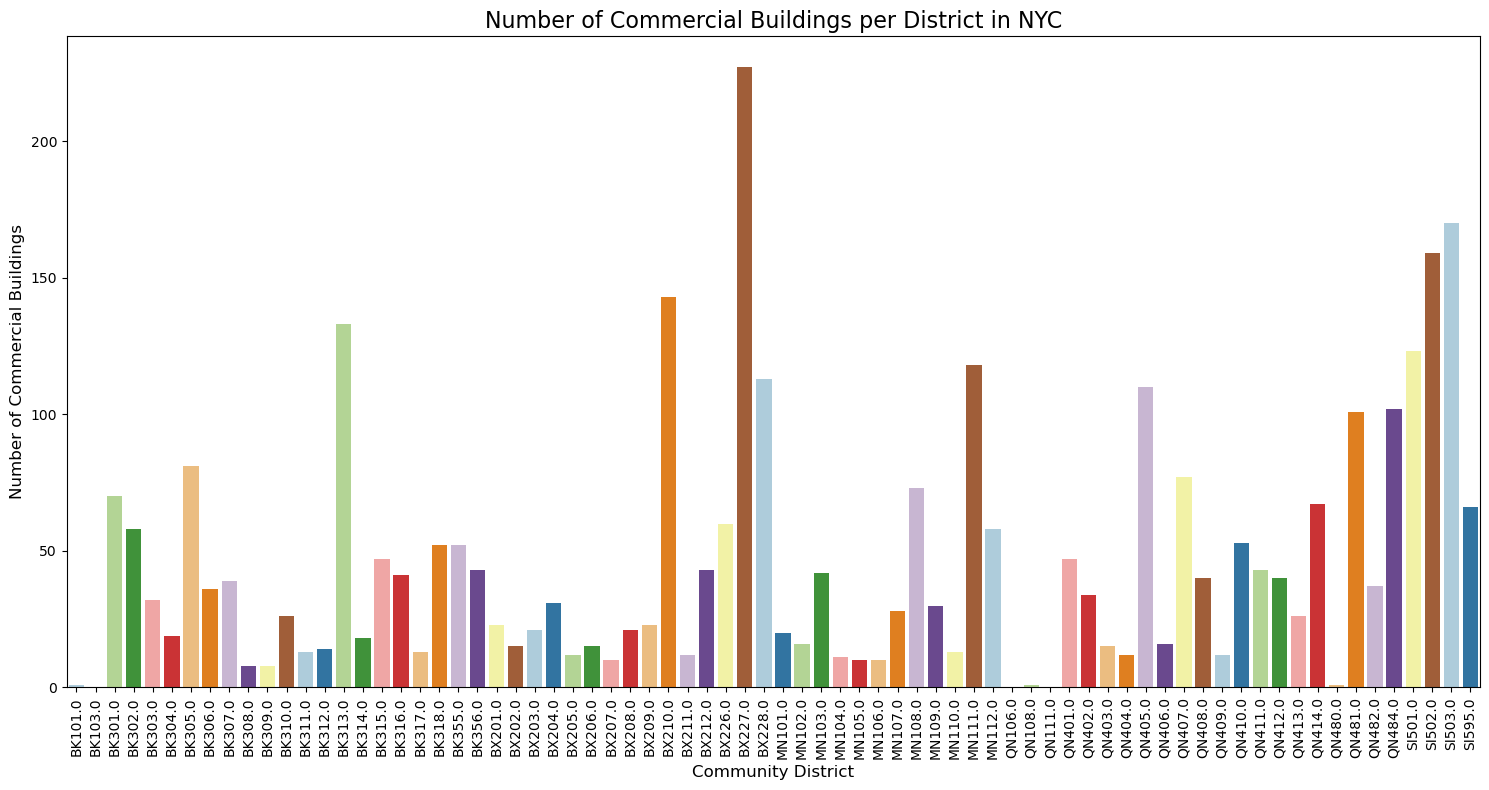

In [139]:
commercial_data = pluto_data[pluto_data['landuse'] == 9]

# Step 3: Group by Borough and Community District and sum the number of buildings
district_commercial_buildings = (
    commercial_data.groupby(['borough', 'cd'])['numbldgs']
    .sum()
    .reset_index()
)

# Step 4: Create a new column for Borough + Community District (e.g., BX01)
district_commercial_buildings['district'] = (
    district_commercial_buildings['borough'] + 
    district_commercial_buildings['cd'].astype(str).str.zfill(2)
)

# Step 5: Sort data for visualization
district_commercial_buildings = district_commercial_buildings.sort_values('district')

# Step 6: Plot a bar chart
plt.figure(figsize=(15, 8))
sns.barplot(
    x='district', 
    y='numbldgs', 
    data=district_commercial_buildings, 
    palette='Paired'
)
plt.xticks(rotation=90)
plt.title('Number of Commercial Buildings per District in NYC', fontsize=16)
plt.xlabel('Community District', fontsize=12)
plt.ylabel('Number of Commercial Buildings', fontsize=12)
plt.tight_layout()

# Save the plot as an image (optional)
plt.savefig('commercial_buildings_per_district.png')

# Show the plot
plt.show()

In [140]:
df1=district_commercial_buildings[district_commercial_buildings["borough"]=="BX"]
df2=district_commercial_buildings[district_commercial_buildings["borough"]=="BK"]
df3=district_commercial_buildings[district_commercial_buildings["borough"]=="MN"]
df4=district_commercial_buildings[district_commercial_buildings["borough"]=="QN"]
df5=district_commercial_buildings[district_commercial_buildings["borough"]=="SI"]

df_num_rec_bldgs = pd.concat([df1,df2,df3,df4,df5], ignore_index=True)
df_num_rec_bldgs=df_num_rec_bldgs[["numbldgs"]]
df_num_rec_bldgs

,numbldgs
0,23.0
1,15.0
2,21.0
3,31.0
4,12.0
...,...
69,102.0
70,123.0
71,159.0
72,170.0
